# **The Data Miners Group Final Project**

JCDS-2504

- Lintang Rizki Ramadhani
- Army Putera Parta
- Nur Ilmalani Harahap

-------------

# **HR Analytics : Employee Promotion Prediction**

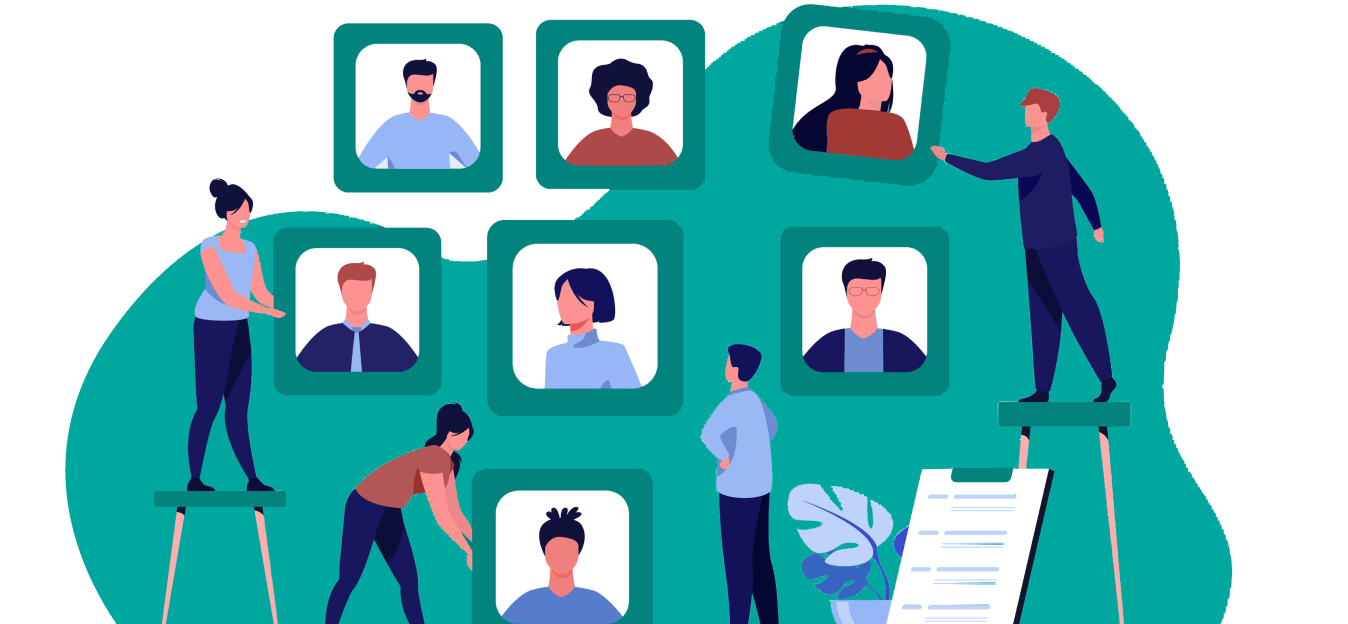

**Contents**
- Business Understanding
- Data Understanding
- Data Splitting
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Modelling and Evaluation
- Conclusions and Recommendations

-------------

# **Business Understanding**

## **Context**

A company with a growing workforce wants to optimize its internal promotion process. The organization is keen to identify employees who are most likely to be promoted based on historical promotion data and various factors such as performance, training, award, service year and demographics. This will help streamline the promotion process, saving time and resources, while ensuring that high-performing employees are rewarded appropriately.


**Target :**

0 : Employee not promoted

1 : Employee promoted

## **Stakeholder**

The **HR Manager** plays a crucial role as a key stakeholder in this project. Their responsibilities include overseeing employee development, talent retention, and succession planning. This analysis provides the HR Manager with **valuable insights to predict which employees are most likely to be promoted**.

## **Problem Statement**

Promoting employees without an effective screening process can lead to inefficiencies, including potential loss of talent and resources. **The company wants to improve the promotion process** by identifying employees who are likely to be promoted based on data-driven insights. This will allow the organization to focus on retaining top talent, planning for promotions more effectively, and ensuring fairness in the selection process.

If the promotion process is handled inefficiently or subjectively, it could lead to dissatisfaction among employees, increased turnover, and higher operational costs. Therefore, it’s crucial to predict which employees are most likely to be promoted and understand the factors contributing to these promotions.

## **Goals**

- **Develop a predictive model to determine the likelihood of an employee being promoted**

  This will enable HR to focus on candidates with high promotion potential, reducing time spent on manual evaluations and increasing the efficiency of the promotion process.

- **Understand the key factors influencing employee promotions**

  Which can help in shaping employee development programs, providing targeted training, and improving overall promotion policies to retain and advance top talent.

## **Analytical Approach**

To address this issue, we will analyze employee promotion data to identify patterns and trends that differentiate employees who have been promoted from those who have not. Based on this analysis, we will **build a classification model that can predict the probability of an employee being promoted.**

By identifying the key factors contributing to promotions, the company can focus on developing and promoting employees who are most aligned with its growth goals, creating a more efficient and data-driven promotion process.

## **Metric Evaluation**

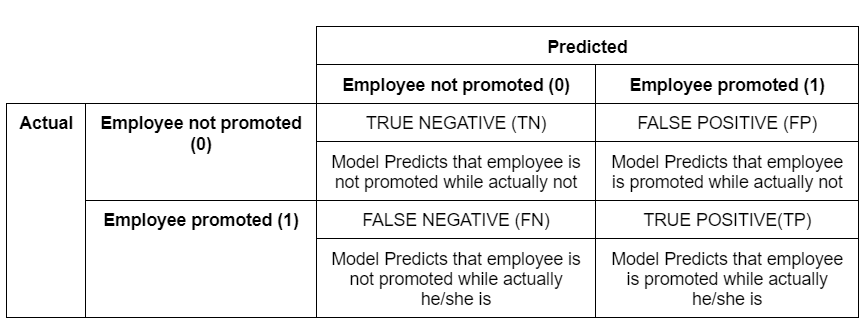

- Type I Error: **False Positive**

  Consequence: **Promoting an employee who should not have been promoted**, which can lead to wasted costs, time, and resources, as well as decreased productivity or morale among other employees.

- Type II Error: **False Negative**

  Consequence: **Missing the opportunity to promote a deserving employee**, which may cause the employee to feel undervalued and possibly seek opportunities outside the company.

Based on these consequences, the main goal is to build a model that can reduce wasted costs and time due to incorrect promotions, while ensuring that deserving employees are not overlooked. Therefore, it is crucial to maintain a balance between precision and recall for the positive class (employees who deserve promotion). As a result, **the primary metric to be used in this model is the F1-Score**.

# **Import libraries**

In [1]:
# Main Module
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# Imputer
from sklearn.impute import SimpleImputer

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Splitting, tuning parameter, & cross validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, classification_report, roc_auc_score

# Feature Selection
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Handling Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Pickle
import pickle

import time
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# **Data Understanding**

Dataset includes a wide range of employee-related information, including demographics, performance history, training, and promotion status. Dataset source : [Kaggle](https://www.kaggle.com/datasets/arashnic/hr-ana/data)

<div style="justify-content: center;">

| Feature              | Description                                                   |
|----------------------|---------------------------------------------------------------|
| employee_id          | Unique ID for employee                                        |
| department           | Department of employee                                        |
| region               | Region of employment (unordered)                              |
| education            | Education Level                                               |
| gender               | Gender of Employee                                            |
| recruitment_channel  | Channel of recruitment for employee                           |
| no_of_trainings      | No of other trainings completed in previous year on soft skills, technical skills, etc. |
| age                  | Age of Employee                                               |
| previous_year_rating | Employee Rating for the previous year                         |
| length_of_service    | Length of service in years                                    |
| awards_won?          | If awards won during the previous year then 1, else 0        |
| avg_training_score   | Average score in current training evaluations                 |
| is_promoted          | Recommended for promotion                                     |

</div>


## **Load Dataset**

In [2]:
#Loading datasets
df=pd.read_csv('train.csv')

In [3]:
# check the first five rows of the dataset
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
# check the last five rows of the dataset
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49,0


In [5]:
# shape of the dataset
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns. ")

This dataset has 54808 rows and 13 columns. 


## **Attributes Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


- There are missing values in the dataset (**education** and **previous_year_rating** columns).
- The **data types appear suitable** for each variable, with categorical variables correctly labeled as objects and numerical variables as integers or floats.
- Target variable (label) : **is_promoted**.
- Rename awards_won? (remove the question mark) for easier analysis.

In [7]:
# rename column
df.rename(columns = {'awards_won?':'awards_won'}, inplace = True)

## **Check Missing Values**

In [8]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

There are **2409 missing values in education** column and there are **4124 missing values in previous_year_rating** column.

<Axes: >

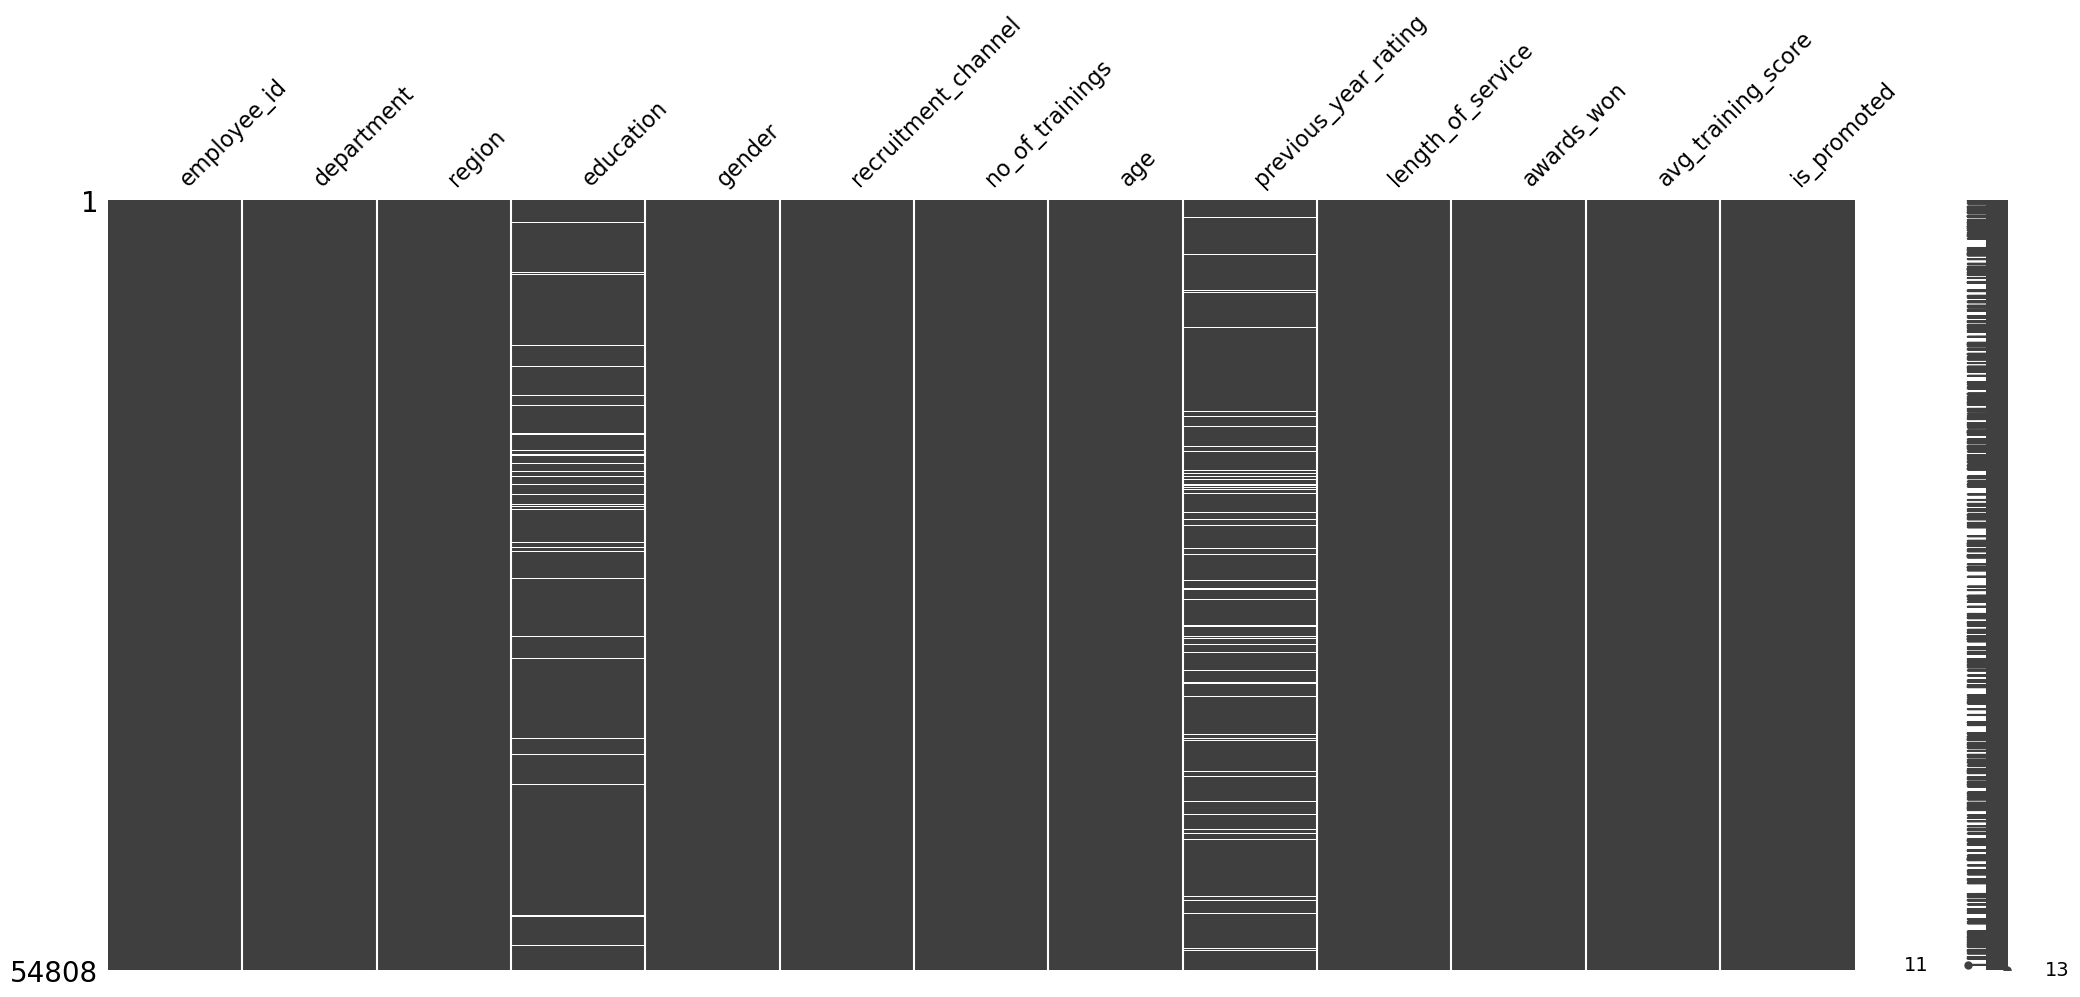

In [9]:
missingno.matrix(df)

## **Check Duplicates**

In [10]:
df.duplicated().sum()

0

There are **no duplicates** found on the dataset.

## **Descriptive Statistics**

In [11]:
df.drop('employee_id', axis=1).describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Observations :

- **no_of_trainings**: On average, employees have undergone around 1.25 training sessions, with a minimum of 1 and a maximum of 10.

- **age** : The average age of employees is approximately 34.80 years, with a minimum age of 20 and a maximum age of 60.

- **previous_year_rating** : The average rating from the previous year is 3.33, with a minimum rating of 1 and a maximum rating of 5.

- **length_of_service** : The average length of service is approximately 5.86 years, with a minimum of 1 year and a maximum of 37 years.

- **awards_won**: A small percentage of employees (2.32%) have won awards.

- **avg_training_score** : The average training score is around 63.39, with a minimum score of 39 and a maximum score of 99.

- **is_promoted** : Approximately 8.52% of employees have been promoted.

In [12]:
# descriptive statistics for object data type
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Observations :
- **department** : there are 9 unique values, the top department is Sales & Marketing with a total of 16840 employees from that department.
- **region** : there are 34 unique values, the region with the most employees is region 2 with the total of 12343 employees.
- **education** : there are 3 unique values, the top education is Bachelor's with a total of 36669 employees.
- **gender** : there are 2 unique values, the top gender is male with a total male employees is 38496.
- **recruitment_channel** : there are 3 unique values, the top recruitment channel is other (not sourcing and reffered) with total of 30466 employees.

Next, we will split the data into training set and testing set.

In [13]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']

# **Data Splitting**

Split the dataset into **70% training set and 30% testing set**. This **testing set is assumed to be future data**, while the **training set is used to train the model** in predicting employee promotion.

In [14]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2020)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38365, 12)

(16443, 12)

(38365,)

(16443,)

In [15]:
# merge X_train dan y_train into train dataframe
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
44037,27737,Legal,region_13,Bachelor's,m,sourcing,1,27,NaN,1,0,60,0
19906,63406,Finance,region_2,Bachelor's,f,other,2,31,4.0,6,0,61,0
6597,23545,Sales & Marketing,region_11,Bachelor's,f,sourcing,1,27,5.0,2,0,49,0
51904,53949,Operations,region_2,NaN,f,other,1,32,5.0,5,0,60,0
19215,3941,Sales & Marketing,region_22,Bachelor's,m,other,1,30,2.0,5,0,50,0


In [16]:
# merge X_test dan y_test into test dataframe
df_test = pd.concat([X_test, y_test], axis=1)
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
41509,52863,Sales & Marketing,region_22,Bachelor's,f,other,1,31,5.0,7,0,47,0
8747,39085,Legal,region_15,Bachelor's,m,other,1,33,1.0,6,0,62,0
45190,42788,Technology,region_11,Bachelor's,f,other,1,31,4.0,10,0,78,0
9374,70905,Sales & Marketing,region_25,Bachelor's,m,other,1,29,NaN,1,0,53,0
34357,5427,Technology,region_22,Bachelor's,f,referred,2,26,4.0,2,0,81,0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38365 entries, 44037 to 6890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           38365 non-null  int64  
 1   department            38365 non-null  object 
 2   region                38365 non-null  object 
 3   education             36709 non-null  object 
 4   gender                38365 non-null  object 
 5   recruitment_channel   38365 non-null  object 
 6   no_of_trainings       38365 non-null  int64  
 7   age                   38365 non-null  int64  
 8   previous_year_rating  35487 non-null  float64
 9   length_of_service     38365 non-null  int64  
 10  awards_won            38365 non-null  int64  
 11  avg_training_score    38365 non-null  int64  
 12  is_promoted           38365 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 4.1+ MB


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 41509 to 5029
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           16443 non-null  int64  
 1   department            16443 non-null  object 
 2   region                16443 non-null  object 
 3   education             15690 non-null  object 
 4   gender                16443 non-null  object 
 5   recruitment_channel   16443 non-null  object 
 6   no_of_trainings       16443 non-null  int64  
 7   age                   16443 non-null  int64  
 8   previous_year_rating  15197 non-null  float64
 9   length_of_service     16443 non-null  int64  
 10  awards_won            16443 non-null  int64  
 11  avg_training_score    16443 non-null  int64  
 12  is_promoted           16443 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.8+ MB


There are missing values on education and previous year rating column for both data train and data test.

Since **employee_id** serve primarily as unique identifiers for records, its typically **do not provide information relevant to predictive modeling or analysis**, as they don’t contribute to understanding patterns or relationships in the data. So, **we choose to drop the column**.


In [19]:
# drop employee id
df_train.drop('employee_id',axis=1,inplace=True)

# **Exploratory Data Analysis (EDA)**

- **EDA on the training set** helps ensure that the model training process is based on the same characteristics as the data the model will eventually see.
- Performing **EDA after the split helps prevent data leakage**, where insights from the test set influence the model training process.

## **Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. Univariate analysis is defined as **analysis carried out on only one** (“uni”) **variable** (“variate”) to summarize or describe the variable.

- First, we will use distribution plots to check the distribution of the numerical columns in the train dataset.
- After that we will check the univariate analysis for categorical columns using pie charts, and count plots.

### **Numerical**

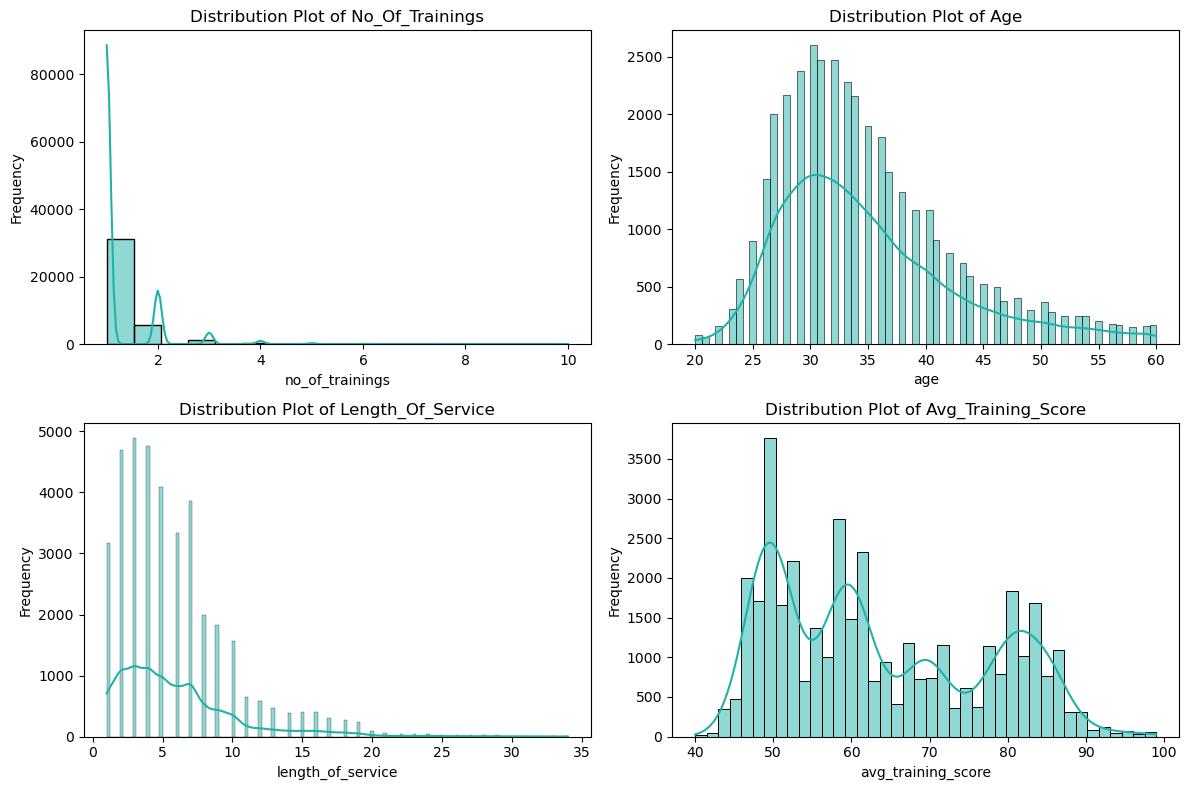

In [20]:
numeric_feat=df_train.select_dtypes(include='number').drop(['awards_won', 'is_promoted','previous_year_rating'], axis=1).columns

# Plotting Distribution plot using for loop
plt.figure(figsize=(12,8))
for i, feat in enumerate(numeric_feat, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feat], kde=True, color='lightseagreen')
    plt.title(f'Distribution Plot of {feat.title()}')
    plt.xlabel(feat)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Observations :

- **no_of_trainings** :

  **Most employees have participated in one or two training** sessions, with the frequency dropping significantly for higher numbers of trainings. This indicates that multiple training sessions are rare, and **most employees likely receive minimal training**.
- **age** :

  The **age distribution is slightly right-skewed**, with a peak around 30 years and a gradual decline towards older ages. This suggests **the company largely composed of younger to middle-aged individuals**, with fewer employees above 50 years.
- **length_of_service** :

  Length of service shows a **right-skewed distribution**, with **most employees having relatively work period under 10 years**. This suggests that long-term employees are less common.
- **avg_training_score** :

  The average training score has **a distribution with peaks at various points**. This could imply differences in training effectiveness or that different groups perform distinctly in training.

From the distributin plots above, it is observed that **none of the numerical features are normally distributed**. To ensure whether the data is not normally distributed, we conducted a **normality test**. We will be using **Kolmogorov Smirnov Normality Test**.

**Normality Test (Kolmogorov-Smirnov Test)**

Kolmogorov-Smirnov Test is a nonparametric test that can be used to test if a set of data is normally distributed.

1. **Hypothesis**
- **Null Hypothesis (H₀)**: The numerical feature follow a normal distribution.
- **Alternative Hypothesis (H₁)**: The numerical feature do not follow a normal distribution.

2. **Interpretation**
  
  Significance level = 0.05
- If **p-value > 0.05** : Do not reject the null hypothesis, suggesting that the numerical feature follow a normal distribution.
- If **p-value ≤ 0.05** : Reject the null hypothesis, suggesting that the numerical feature do not follow a normal distribution.

In [21]:
numeric_feat = df_train.select_dtypes(include='number').drop(['awards_won', 'is_promoted', 'previous_year_rating'], axis=1).columns
normality_results = {}

for feat in numeric_feat:
    # Generate a normal distribution with the same mean and standard deviation as the feature
    stat, p_value = stats.kstest(df_train[feat].dropna(), 'norm', args=(df_train[feat].mean(), df_train[feat].std()))
    normality_results[feat] = {'statistic': stat, 'p-value': p_value}

# Display results
normality_df = pd.DataFrame(normality_results)
normality_df


,no_of_trainings,age,length_of_service,avg_training_score
statistic,0.470456,0.117093,0.14754,0.1155
p-value,0.000000,0.000000,0.00000,0.0000


**Interpretation:**

Since the p-values are all less than the significance level (p-value <
0.05), we can confirm that **none of the numerical features are normally distributed.**

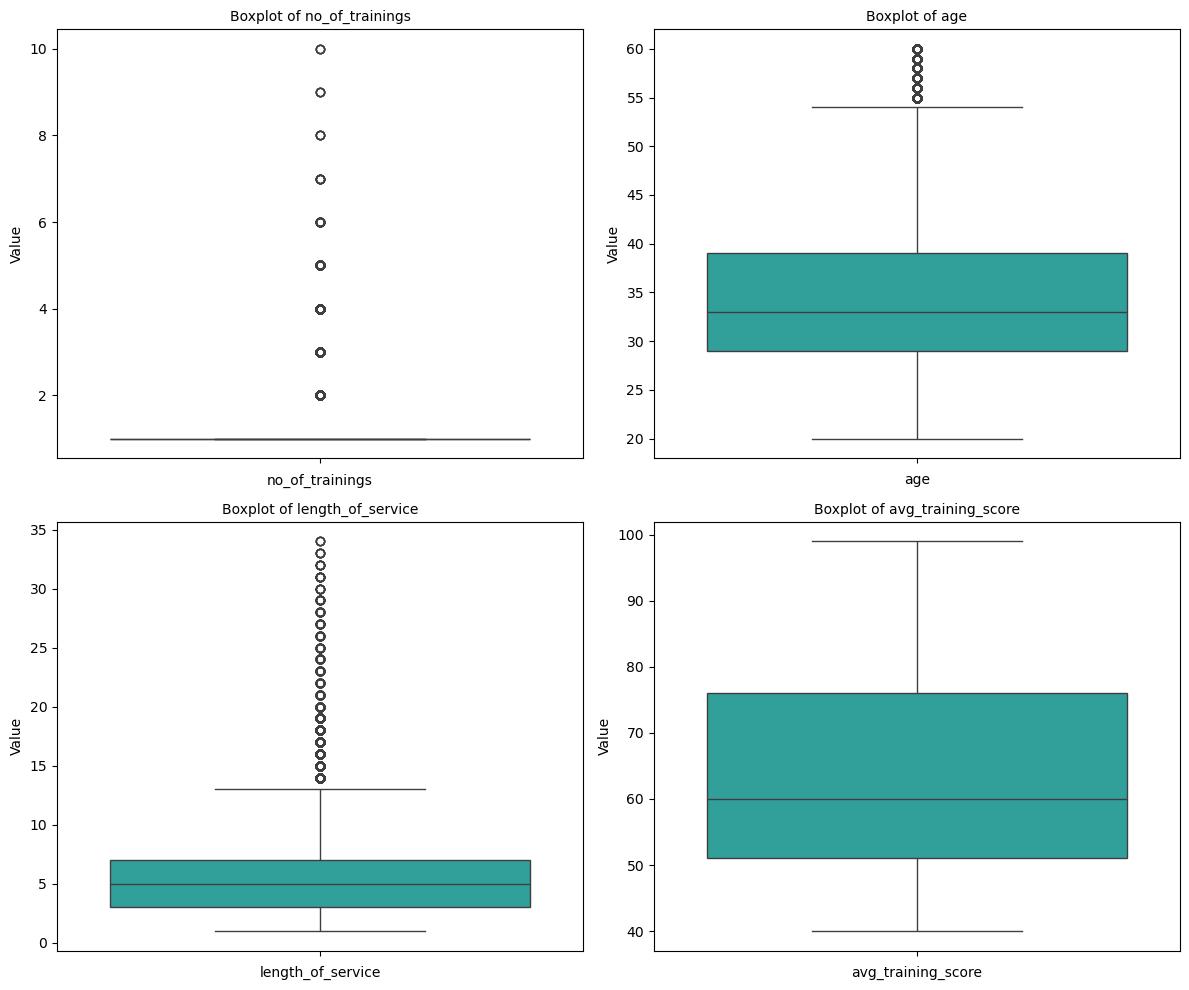

In [22]:
numeric_feat = df_train.select_dtypes(include='number').drop(['awards_won', 'is_promoted', 'previous_year_rating'], axis=1).columns

# plot boxplot to check outliers
plt.figure(figsize=(12,10))

for i, column in enumerate(numeric_feat):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_train[column], color='lightseagreen')
    plt.title(f'Boxplot of {column}', fontsize=10)
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

Based on the boxplot above, it is known that there are outliers in the **no_of_training, age, and length_of_service** columns. There seems no reason to drop the outliers, because the outlier values still make sense in the real-world context.

### **Categorical**

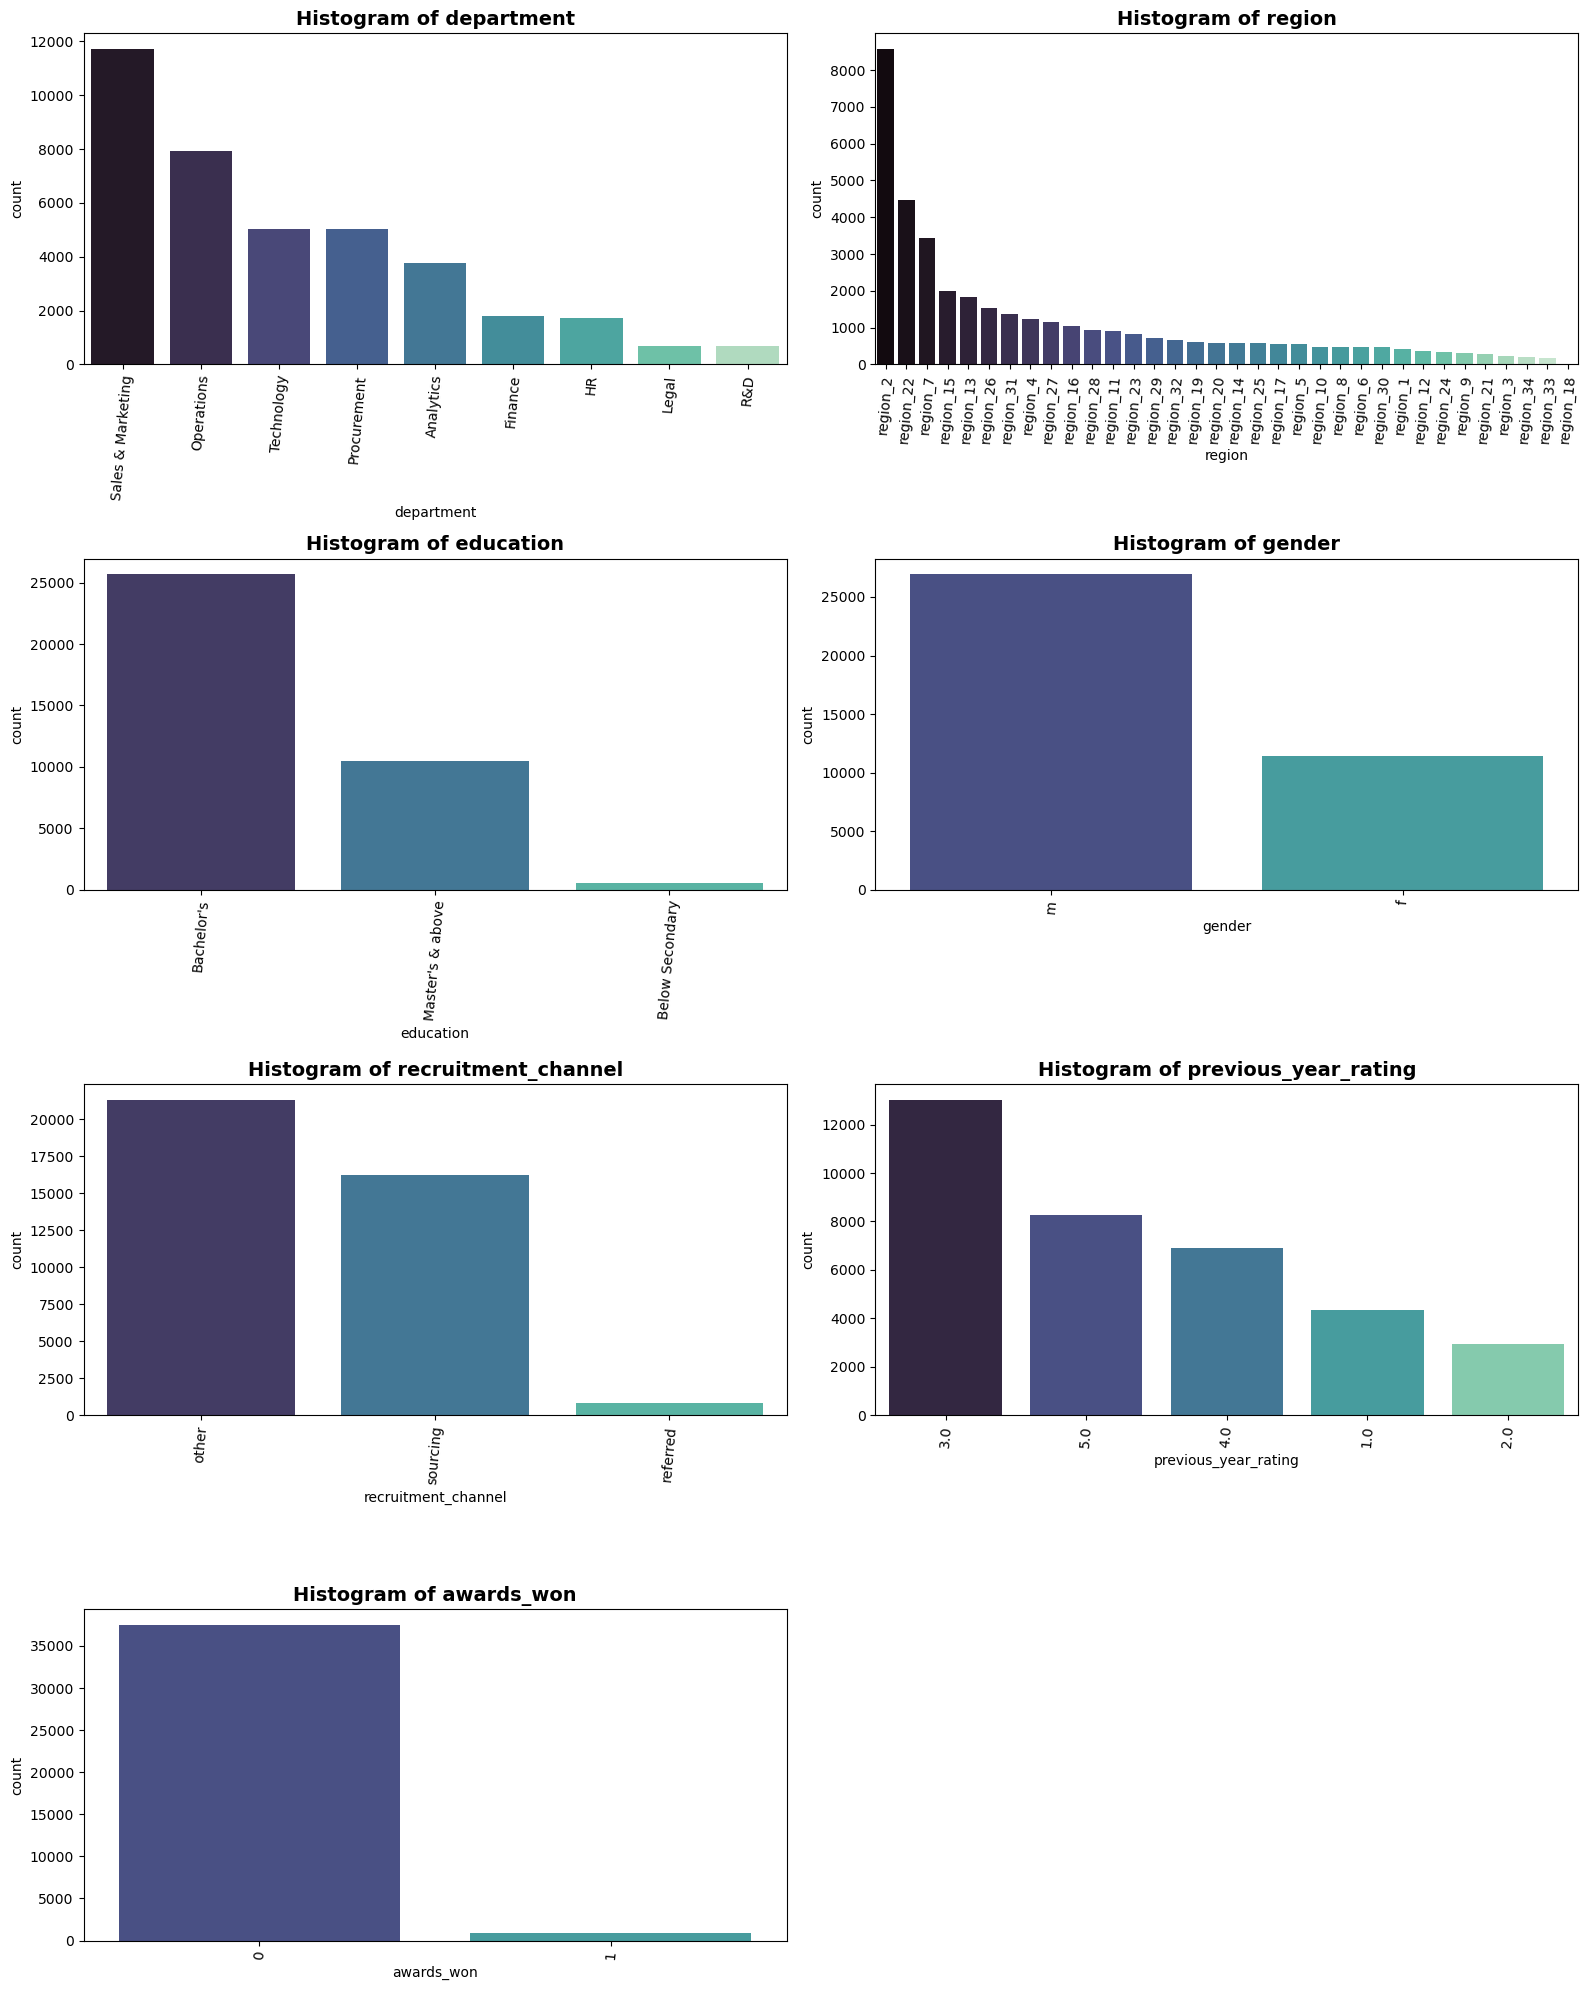

In [23]:
# Create Count Plot for Categorical Columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

# List of categorical columns to plot
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel','previous_year_rating','awards_won']

# Iterate over each specified categorical column and plot in each subplot
for i, x in enumerate(categorical_columns):
    # Calculate the frequency of values in the categorical column
    count_values = df_train[x].value_counts(ascending=False)

    # Plot countplot with ordering based on frequency
    sns.countplot(data=df_train, x=x, order=count_values.index, ax=axes[i],palette='mako')

    # Rotate x-axis labels for readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=85)

    # Set the title for each subplot
    axes[i].set_title(f'Histogram of {x}', fontsize=14, fontweight='bold')

# Remove the extra empty subplot
fig.delaxes(axes[-1])


plt.tight_layout()
plt.show()

Observations :

- **department** :
  - The department with the highest number of employees is **"Sales & Marketing"**.
  - **"Finance," "HR," "Legal," and "R&D"** have significantly fewer employees, indicating that **these departments are much smaller in size**.
- **region** :
  - A few regions (like **"region_2," "region_22," and "region_7"**) have a **high number of employees**, while most other regions have far fewer employees.
  - This concentration of employees in specific regions could indicate that **the company's main offices, operations, or market focus are primarily located in those areas with higher employee counts**.
  - Regions with low employee counts may represent **areas where the company has smaller offices**, limited operations.
- **education** :
  - Majority of employees have a **Bachelor's degree** while a smaller portion holds a **"Master's & above"** degree.
  - The **"Below Secondary"** category is very limited, showing that most employees have at least an undergraduate education.
- **gender** :
  - The number of **male** employees is about 2 times more than female employees.
  - This suggests **potential gender disparity** in the workforce.
- **recruitment channel** :
  - **Most employees were recruited through the "other" and "sourcing" channels**, with "referred" being the least common.
  - This might imply that referrals are not the primary recruitment method for this company.
- **previous year rating** :
  - The most common rating is 3.0. This suggests that a **large portion of employees are considered to perform at an average level**.
  - Ratings 4.0 and 5.0 are also common, indicating that **a significant number of employees perform above average**.
- **awards won** :
  - The **majority of employees, have not won awards**, while only a small portion have received awards.
  - This suggests that **awards are either rare or given under very selective criteria**, potentially making them highly competitive or reserved for exceptional achievements.


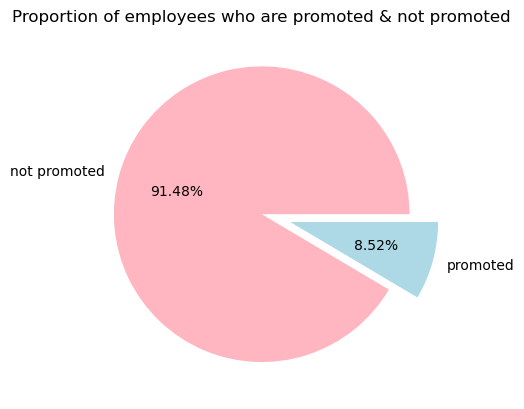

In [24]:
# check label class balance
promoted_agg = df_train['is_promoted'].value_counts(normalize=1).reset_index()
promoted_agg.columns = ['is_promoted', 'proportion']
promoted_agg['percentage'] = 100 * promoted_agg['proportion']

# Setting explode value for "promoted" 
explode_values = [0, 0.2]  # No explode for 'not promoted', slight explode for 'promoted'

plt.pie(
    data=promoted_agg,
    x='percentage',
    labels=['not promoted', 'promoted'],
    autopct='%1.2f%%',
    textprops=dict(color="black"),
    colors=['lightpink', 'lightblue'],
    explode=explode_values
)
plt.title('Proportion of employees who are promoted & not promoted')
plt.show()

- **Imbalanced Classes**:
  
  There is a significant imbalance in the dataset, with **a small proportion of employees (only 8.52%) receiving promotions**. This suggests that promotions are relatively rare.


## **Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. Bivariate analysis is used to understand the relationship, correlation, or association between two variables.

- Types of Bivariate Analysis :
  - Categorical vs Numerical
  - Categorical vs Categorical
  - Numerical vs Numerical


### **Categorical (Label) vs Numerical**

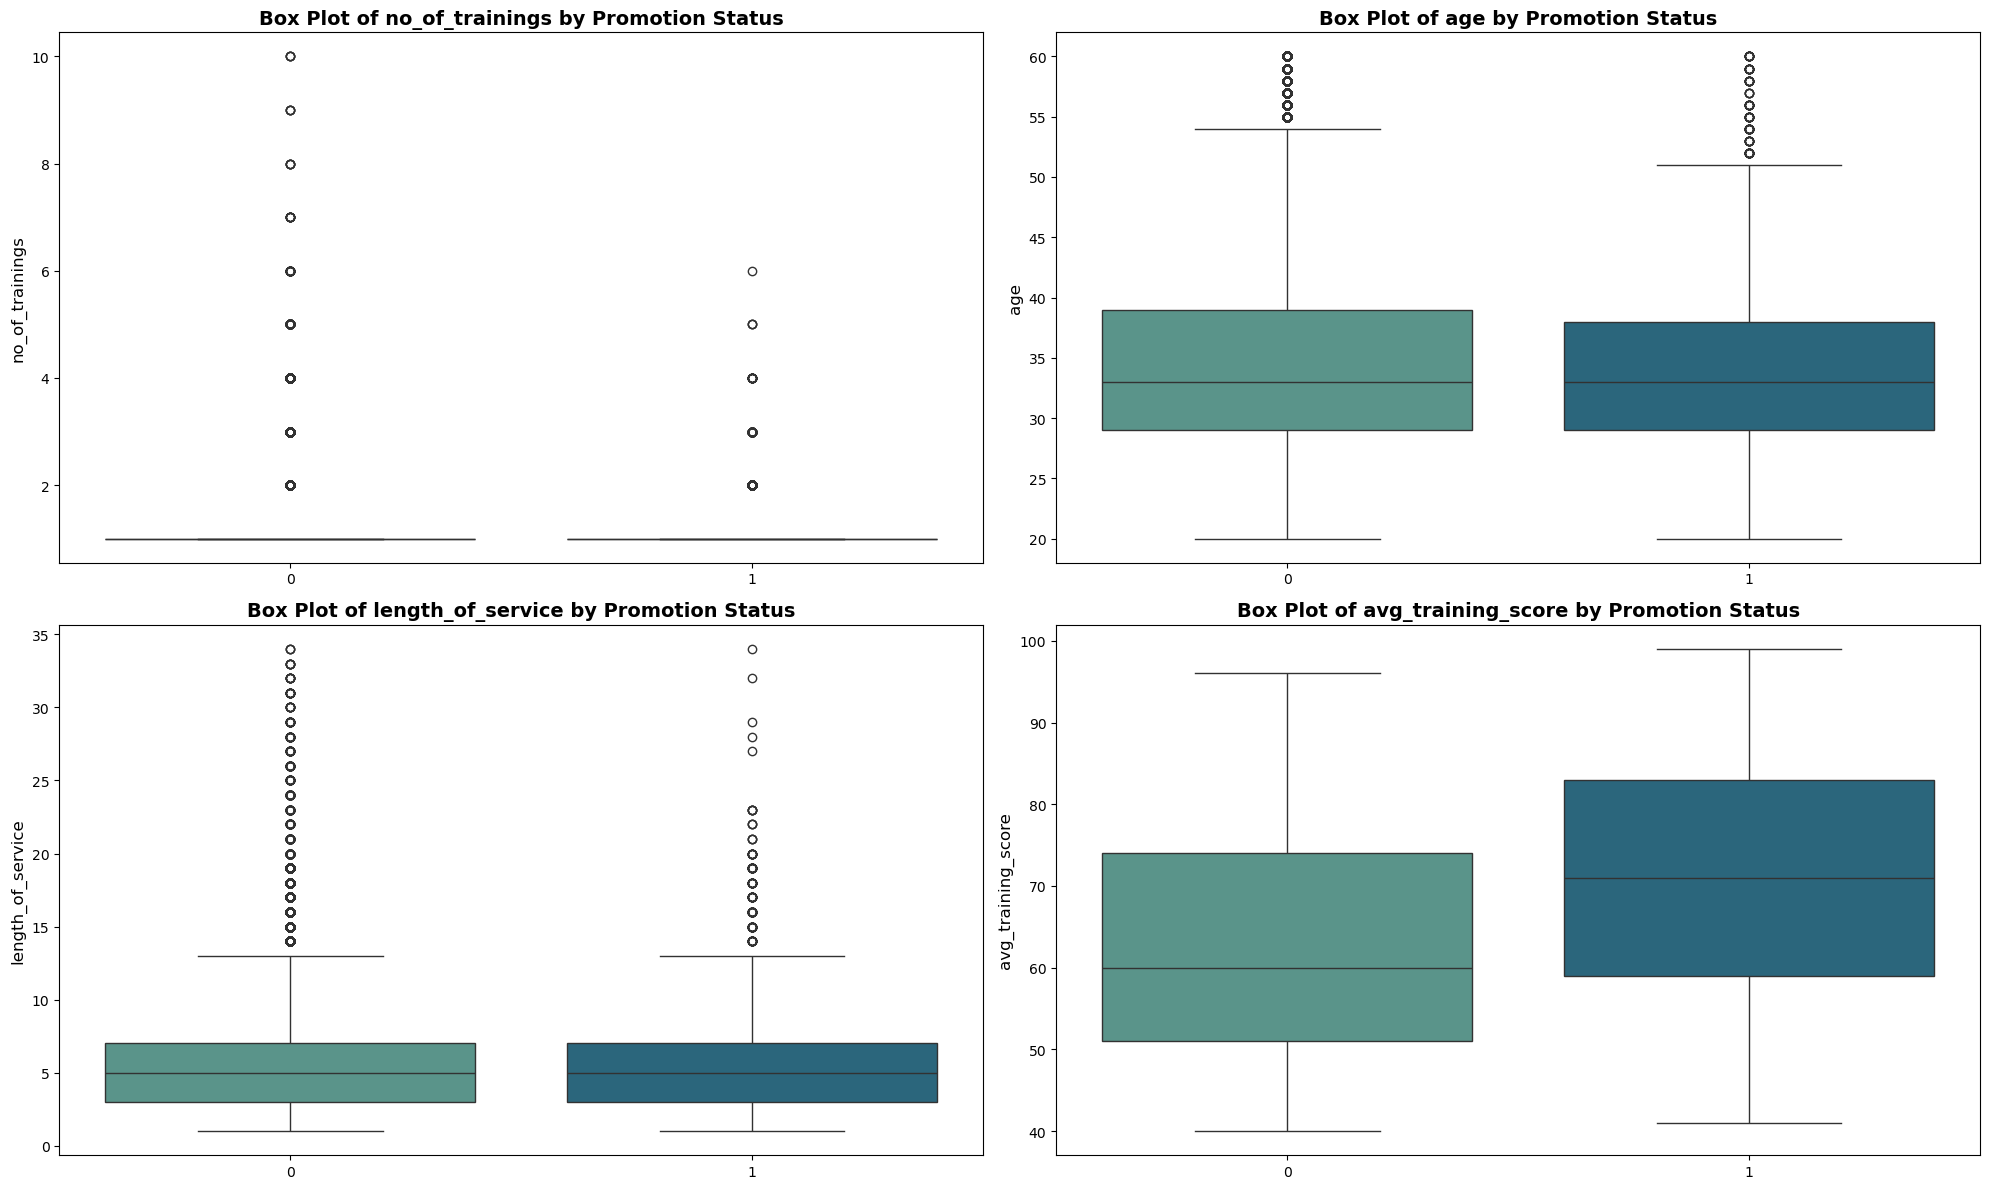

In [25]:
# Define the list of numerical variables and the categorical label
numerical_columns = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']
label = 'is_promoted'

# Define the figure and axes for a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), dpi=100)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create a box plot for each numerical variable grouped by the label
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df_train, x=label, y=col, ax=axes[i], palette='crest')
    axes[i].set_title(f'Box Plot of {col} by Promotion Status', fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")  # Remove x-axis label for clarity
    axes[i].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

Observations :

- **no of trainings vs promotion status** :
  
  There is **little to no variation in the number of trainings** attended by promoted versus non-promoted employees. **Most employees**, regardless of promotion status, **attended a minimal number of trainings (around 1–2)**. Which means that the no of training does not affect employee promotion.
- **age vs promotion status** :

  The **age distributions for promoted and non-promoted employees are similar**, with a median age in the early to mid-30s. Which means that employee's age does not affect employee promotion.
- **length of service vs promotion status** :

  The **length of service distributions for promoted and non-promoted employees are similar**, with a median length of service in the 5 years. Which means that the length of service does not affect whether an employee will be promoted or not.
- **average training score vs promotion status** :

  The **median of average training score is higher for promoted employees compared to non-promoted employees**. This suggests promoted employees have higher average training score. Which means that the average training score have an affect whether an employee will be promoted or not.

### **Categorical vs Categorical**

In [26]:
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel','previous_year_rating','awards_won']

for i in categorical_columns:
    promotion_df = df_train.groupby(i)['is_promoted'].describe().reset_index().sort_values(by='mean',ascending=False)[[i,'count','mean']]
    display(promotion_df)


,department,count,mean
8,Technology,5051.0,0.104930
5,Procurement,5031.0,0.096800
0,Analytics,3755.0,0.091877
4,Operations,7917.0,0.090944
1,Finance,1786.0,0.079507
7,Sales & Marketing,11717.0,0.073312
6,R&D,695.0,0.066187
2,HR,1716.0,0.058858
3,Legal,697.0,0.054519


,region,count,mean
28,region_4,1230.0,0.143902
8,region_17,561.0,0.133690
17,region_25,572.0,0.124126
20,region_28,938.0,0.117271
15,region_23,821.0,0.115713
22,region_3,243.0,0.111111
14,region_22,4477.0,0.107885
31,region_7,3449.0,0.107277
0,region_1,425.0,0.103529
23,region_30,461.0,0.091106


,education,count,mean
2,Master's & above,10503.0,0.099686
0,Bachelor's,25661.0,0.081719
1,Below Secondary,545.0,0.075229


,gender,count,mean
0,f,11444.0,0.089829
1,m,26921.0,0.083206


,recruitment_channel,count,mean
1,referred,806.0,0.106700
0,other,21308.0,0.084851
2,sourcing,16251.0,0.084549


,previous_year_rating,count,mean
4,5.0,8256.0,0.161943
3,4.0,6907.0,0.080353
2,3.0,13023.0,0.073255
1,2.0,2956.0,0.044993
0,1.0,4345.0,0.013579


,awards_won,count,mean
1,1,895.0,0.434637
0,0,37470.0,0.076835


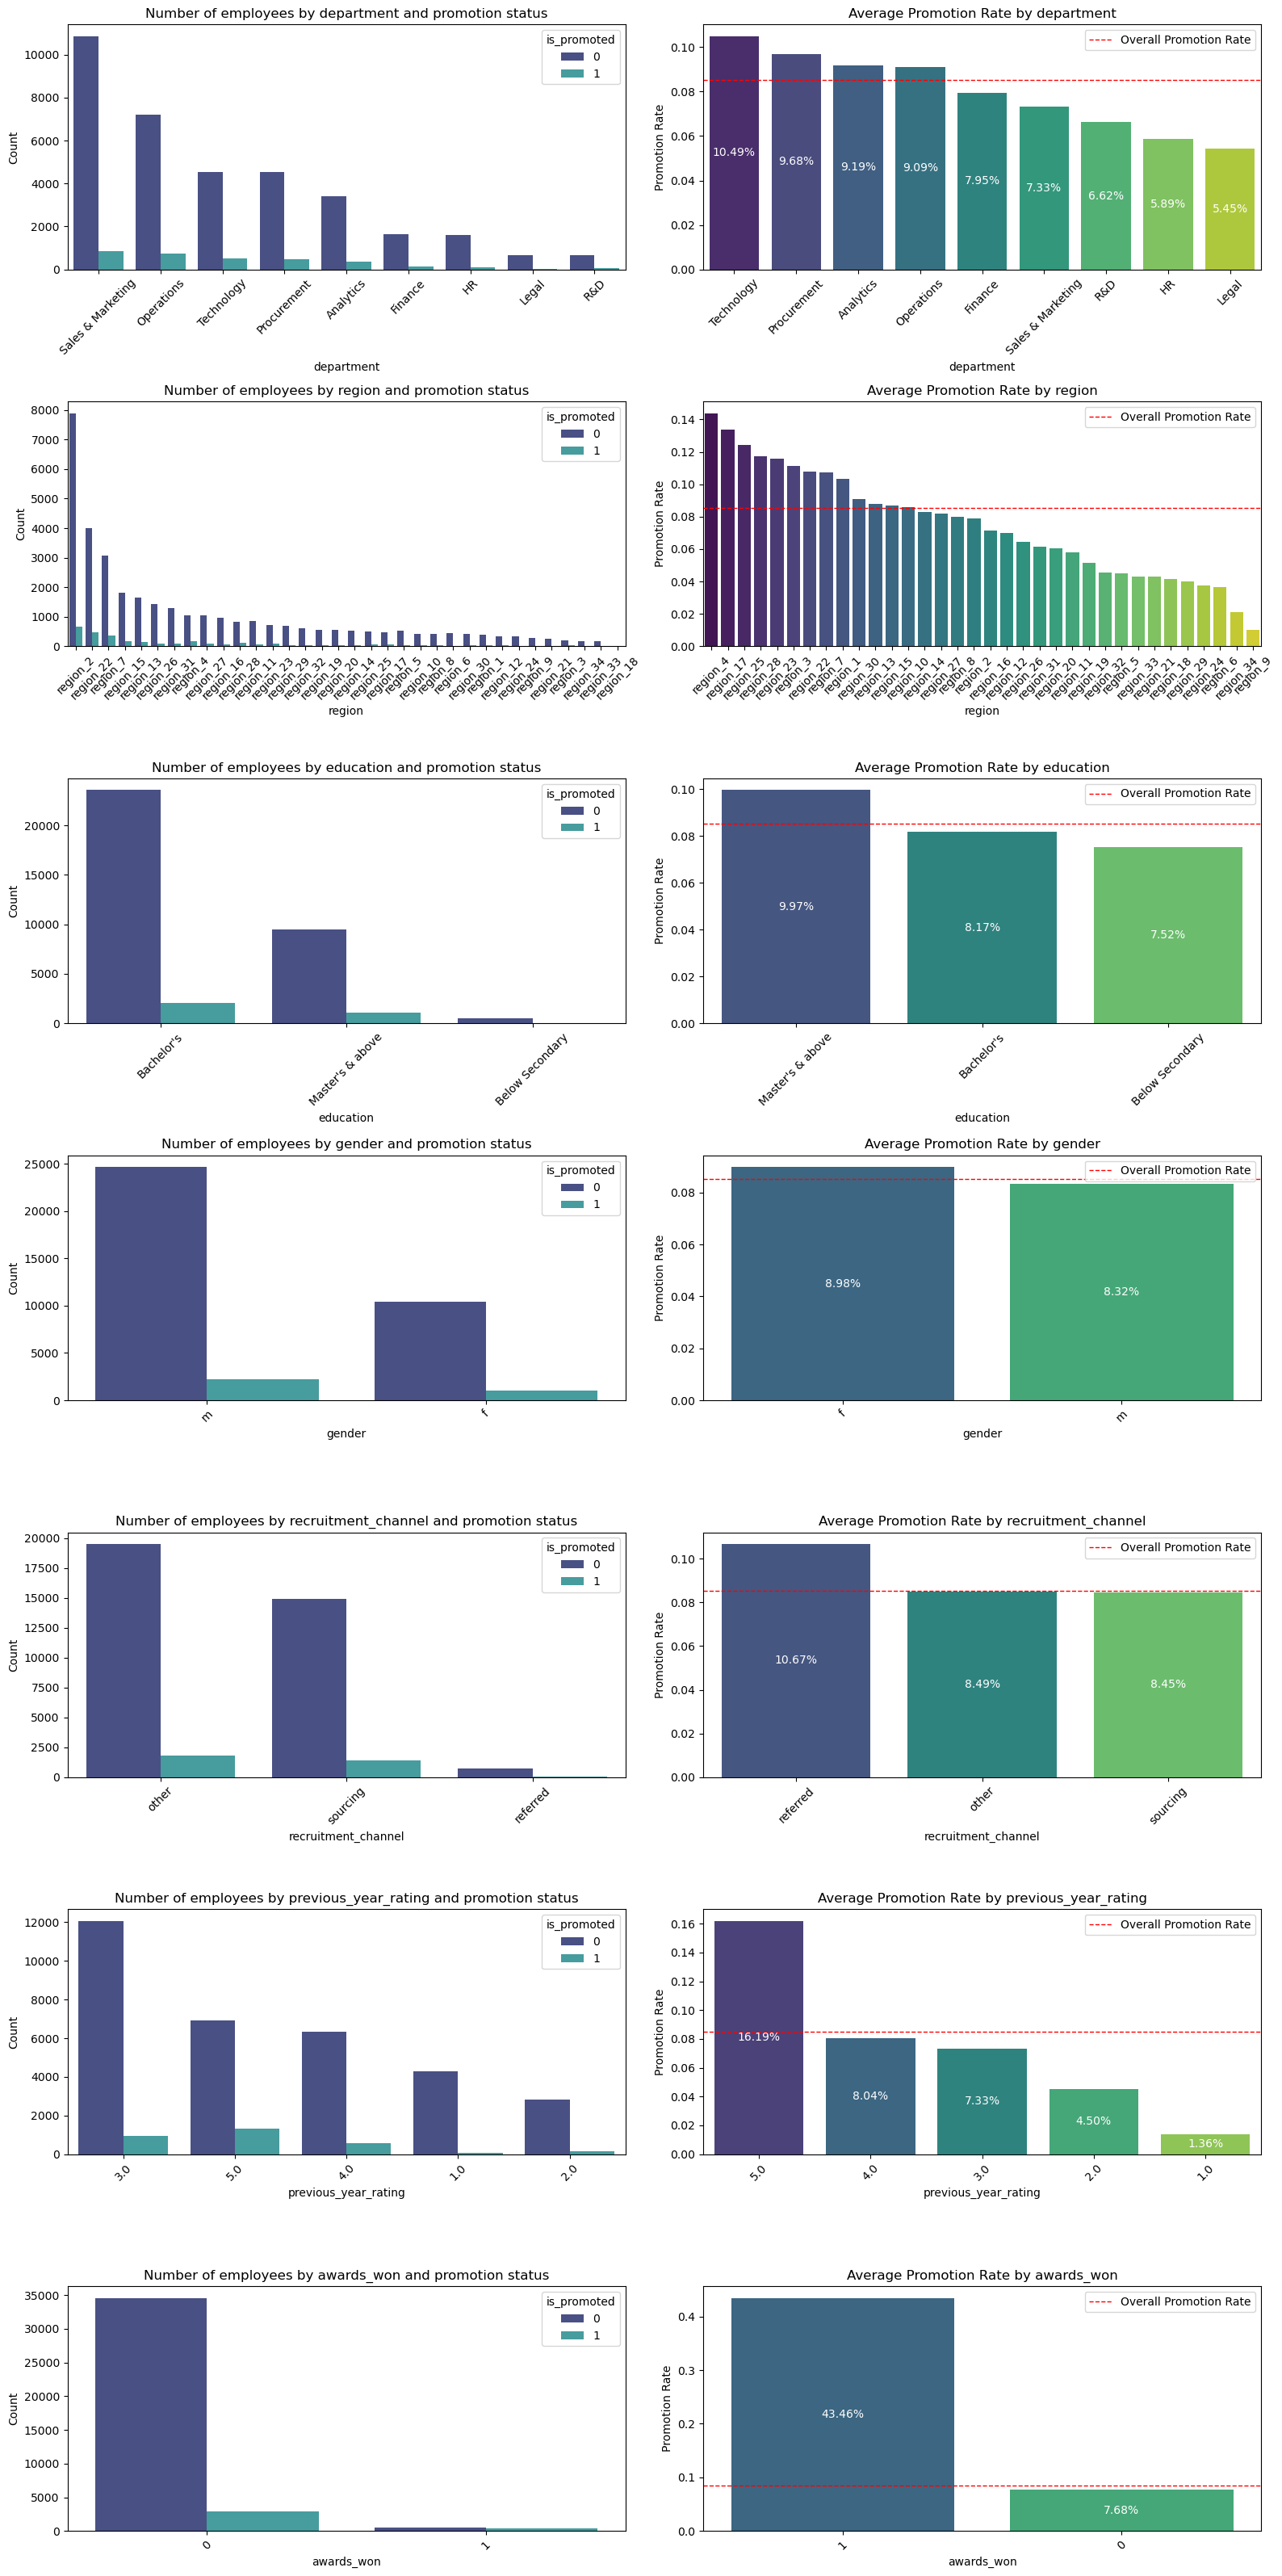

In [28]:
# Define the list of categorical variables
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel','previous_year_rating','awards_won']

# Calculate the overall promotion rate
overall_promotion_rate = df_train['is_promoted'].mean()

# Set up a large figure to contain all subplots
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(16, 32))

# Iterate over each categorical variable
for i, column in enumerate(categorical_columns):

    # First subplot: count plot with hue for is_promoted
    sns.countplot(data=df_train, x=column, hue='is_promoted', 
                  order=df_train[column].value_counts().index, 
                  palette='mako', ax=axes[i, 0])
    axes[i, 0].set_title(f'Number of employees by {column} and promotion status', fontsize=12)
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Calculate promotion rate statistics
    promotion_df = df_train.groupby(column)['is_promoted'].describe().reset_index().sort_values(by='mean', ascending=False)[[column, 'count', 'mean']]

    # Second subplot: bar plot of promotion rate, sorted in descending order
    sns.barplot(data=promotion_df, x=column, y='mean', palette='viridis', ax=axes[i, 1], order=promotion_df[column])
    axes[i, 1].set_title(f'Average Promotion Rate by {column}', fontsize=12)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Promotion Rate')
    axes[i, 1].tick_params(axis='x', rotation=45)

    # Add a horizontal line for the overall promotion rate
    axes[i, 1].axhline(overall_promotion_rate, color='red', linestyle='--', linewidth=1, label='Overall Promotion Rate')
    axes[i, 1].legend(loc='upper right')

    # Add annotations for promotion rate bar plot
    if column != 'region':
        for p in axes[i, 1].patches:
            axes[i, 1].annotate(
                f'{p.get_height():.2%}',  # Format as a percentage with 2 decimal points
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),  # Position in the center of the bar
                ha='center', va='center',  # Center alignment
                fontsize=10, color='white'
            )

plt.tight_layout()
plt.show()


Observations :
1. **Department**
  - **Employee Distribution**: The "Sales & Marketing" and "Operations" departments have the most employees, but these departments don’t have the highest promotion rates.
  - **Highest Promotion Rates**: "Technology" (10.48%) department have the highest promotion rates.
  - **Lowest Promotion Rates**: "HR" (5.89%) and "Legal" (3.45%) departments have the lowest promotion rates.
  
2. **Region**
  - **Employee Distribution**: Region 2 and Region 22 have the largest number of employees, but the promotion rates vary widely across regions, indicating that region-specific factors may influence promotions.
  - **Promotion Rate Variance**: There's significant variation in promotion rates across regions, with some regions nearing 14% while others fall below 2%
  
3. **Education**
  - **Employee Distribution**: Most employees have a "Bachelor's" degree, but having a higher degree correlates with a higher chance of promotion.
  - **Highest Promotion Rates**: Employees with "Master's & above" have the highest promotion rate at 9.97%.
  - **Lower Promotion Rates**: "Below Secondary" education levels has the lowest promotion rates (7.52%).
  
4. **Gender**
  - **Employee Distribution**: There is a larger number of male employees compared to female employees in the dataset.
  - **Similar Promotion Rates**: Both genders have comparable promotion rates, with females slightly higher (8.89%) compared to males (8.38%).
  
5. **Recruitment Channel**
  - **Employee Distribution**: The majority of employees were recruited through the "other" channel, while "referred" is the least common recruitment channel.
  - **Highest Promotion Rate**: Employees recruited through the "referred" channel have the highest promotion rate (10.67%), suggesting that referrals may have an advantage in promotions.
  - **Lower Promotion Rates**: Employees recruited through "other" (8.49%) and "sourcing" (8.45%) channels have similar lower promotion rates.
  
6. **Awards Won**
  - **Employee Distribution**: Most employees did not win awards, indicating that awards are a rare achievement in this dataset but highly beneficial for promotion chances.
  - **Strong Impact on Promotion**: Employees who won awards have a significantly higher promotion rate (43.46%) compared to those who did not (7.68%). Winning an award is clearly associated with a higher chance of promotion.
  
7. **Previous Year Rating**
  - **Employee Distribution**: Ratings of 3.0 and 4.0 are the most common.
  - **Higher Ratings Lead to More Promotions**: Employees with a rating of 5.0 have the highest promotion rate (16.19%), followed by ratings of 4.0 and 3.0. This suggests that recent high performance has a strong correlation with promotion likelihood.
  - **Lowest Promotion Rate**: Employees with a rating of 2.0 or below have the lowest promotion rate (1.36%).

**Chi Square Test**

Chi-Square test (χ² test) is a statistical test used to determine if there is a significant association between two categorical variables. In the context of machine learning and data analysis, it’s often used to see if a categorical feature is associated with a target variable. We will use this test to check if there is an association between categorical features and label.

- **Null Hypothesis (H₀)**: There is no association between the two categorical variables (they are independent).
- **Alternative Hypothesis (H₁)**: There is an association between the two categorical variables (they are not independent).

If the p-value is below a chosen significance level **(p-value < 0.05), we reject the null hypothesis** and conclude **there is a significant association between the variables**.

In [29]:
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'previous_year_rating','awards_won']

# Initialize a list to store the results
results = []

# Loop through each categorical column and perform Chi-Square test
for col in categorical_columns:
    contingency_table = pd.crosstab(df_train[col], df_train['is_promoted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Append the results as a dictionary
    results.append({
        'Feature': col,
        'Chi2 Statistic': chi2,
        'p-value': p
    })

# Convert results into a DataFrame
chi2_results_df = pd.DataFrame(results)

# Display the results DataFrame
chi2_results_df

,Feature,Chi2 Statistic,p-value
0,department,88.333651,1.012853e-15
1,region,319.101346,1.520018e-48
2,education,31.289800,1.605115e-07
3,gender,4.434721,3.521497e-02
4,recruitment_channel,4.902683,8.617789e-02
5,previous_year_rating,992.649866,1.397850e-213
6,awards_won,1431.482021,0.000000e+00


Interpretation :
- **department** : because p-value < 0.05, department is significantly **associated** with the label (is_promoted).
- **region** : because p-value < 0.05, region is significantly **associated** with the label (is_promoted).
- **education** : because p-value < 0.05, education is significantly **associated** with the label (is_promoted).
- **gender** : the p-value (0.035) < 0.05, indicating **a weak but statistically significant association**.
- **recruitment_channel** : the p-value (0.086) is above 0.05 (p-value > 0.05), suggesting **no significant association** between recruitment_channel and the label.
- **awards_won** : with an extremely high Chi-Square statistic and a p-value of effectively zero, awards_won is **very strongly associated** with the label.
- **previous_year_rating** : this feature shows an **extremely strong association** with the target, given the high Chi-Square statistic and near-zero p-value.

Since recruitment_channel has no significant association, **we will try run the model with and without recruitment_channel** to compare performance. If the F1 score improve without recruitment_channel, then excluding it makes sense.

### **Numerical vs Numerical**

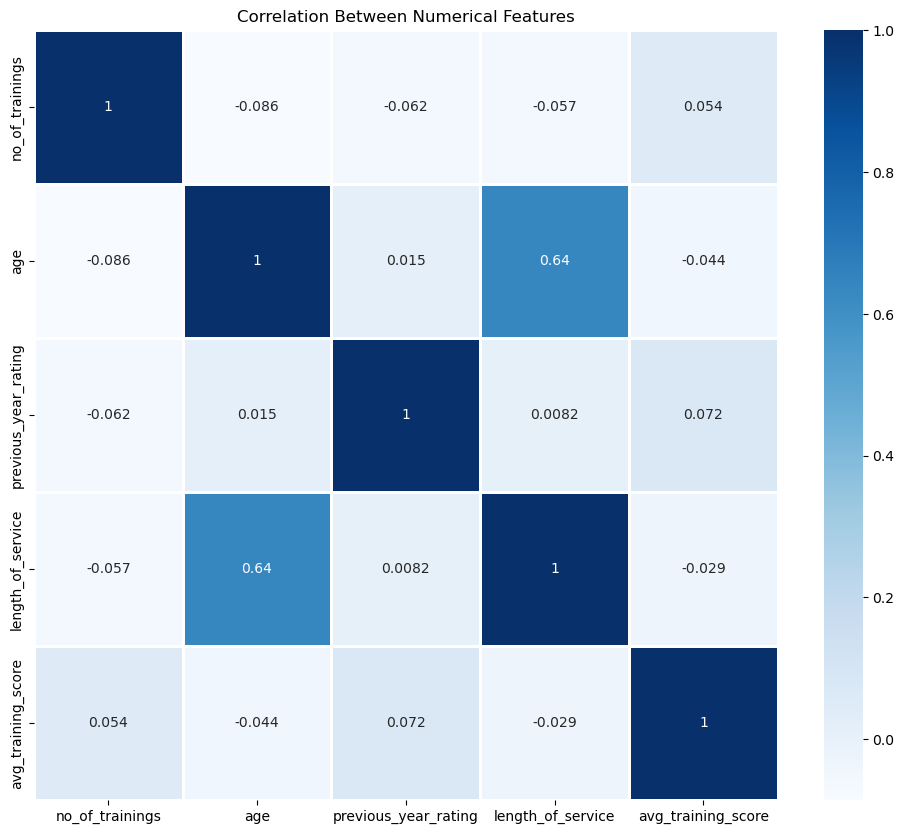

In [30]:
# plotting heatmap correlation
plt.figure(figsize = (12, 10))
sns.heatmap(df_train.select_dtypes(include='number').drop(['awards_won','is_promoted'],axis=1).corr(method='spearman'), annot=True, square=False, linewidth=0.8, cmap='Blues')
plt.title('Correlation Between Numerical Features')
plt.show()

Correlation coefficient	Interpretation : 
- -1 : Very Strong Negative Correlation
- Between -1 and <= -0.7 : Strong Negative Correlation
- Between > -0.7 and <= -0.4 : Moderate Negative Correlation
- Between > -0.4 and < 0 : Weak Negative Correlation
- 0	: No Correlation
- Between 0 and < 0.4 : Weak Positive Correlation
- Between >= 0.4 and < 0.6 : Moderate Positive Correlation
- Between >= 0.6 and < 1 : Strong Positive Correlation
- 1	: Very Strong Positive Correlation


If two features are correlated and the correlation coeffiecient is more than 0.7 we need to drop one of them. Based on the heatmap correlation above :
- There is a moderate positive correlation (0.64) between length_of_service and age. This suggests that older employees tend to have longer service periods. Since the correlation coefficient is less than 0.7, we choose to keep the features
- Other features show weak correlations with each other.ch other.

# **Data Preprocessing**

This step includes :
- Handling Missing Values
- Feature Engineering

## **Handling Missing Values**

In [31]:
df_train.isnull().sum()

department                 0
region                     0
education               1656
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    2878
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

There could be several reasons for missing values in the education and previous_year_rating columns.

For **education** :
- Data entry errors : Mistakes during data entry, such as typos.
- Non-Response : In surveys or forms, individuals may skip questions related to their education level, either intentionally or unintentionally, resulting in missing entries.

First, we check for pattern for missing value in the education column.

In [32]:
df_train[df_train['education'].isnull()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
51904,Operations,region_2,NaN,f,other,1,32,5.0,5,0,60,0
33119,Sales & Marketing,region_31,NaN,m,sourcing,1,28,3.0,5,0,48,0
11859,Analytics,region_22,NaN,f,other,1,28,3.0,4,0,83,0
49766,Sales & Marketing,region_11,NaN,m,other,1,37,5.0,8,0,53,0
32661,Finance,region_2,NaN,f,other,1,32,3.0,6,0,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13990,Sales & Marketing,region_22,NaN,m,other,1,23,NaN,1,0,42,0
51141,Procurement,region_2,NaN,m,other,1,33,4.0,4,0,73,0
10165,Operations,region_15,NaN,m,other,2,31,3.0,3,0,59,0
51409,Analytics,region_2,NaN,m,sourcing,2,40,3.0,2,0,84,0


After we check, **no pattern can be found for the missing value in the education column**.

Check the promotion rate for the group with missing values in the education column.

In [33]:
df_train[df_train['education'].isnull()]['is_promoted'].mean()

0.050120772946859904

The promotion rate for the group with missing values is 0.0501.

So, we will **fill the missing values in the education column based on the education level with the promotion rate closest to 0.0501**.
1. Calculate the promotion rate for each education level.
2. Identify the education level with the promotion rate closest to 0.0501.
3. Fill the missing values in the education column with this education level

In [34]:
df_train.groupby('education')['is_promoted'].mean().sort_values(ascending=False)

education
Master's & above    0.099686
Bachelor's          0.081719
Below Secondary     0.075229
Name: is_promoted, dtype: float64

Since the **education level with the promotion rate closest to 0.0501 is "Below Secondary"**, we can fill the missing values in the education column with this level.

Next, we check the pattern for missing values in previous year rating column.

In [35]:
df_train[df_train['previous_year_rating'].isnull()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
44037,Legal,region_13,Bachelor's,m,sourcing,1,27,NaN,1,0,60,0
43487,Procurement,region_17,Bachelor's,f,sourcing,1,28,NaN,1,0,68,0
29682,Procurement,region_31,Bachelor's,m,other,2,26,NaN,1,0,72,0
48024,Sales & Marketing,region_15,Bachelor's,m,sourcing,1,29,NaN,1,0,52,0
30333,Operations,region_22,Bachelor's,m,other,1,29,NaN,1,0,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41591,Operations,region_31,NaN,m,other,1,27,NaN,1,0,63,0
26835,Finance,region_10,Bachelor's,m,other,1,30,NaN,1,0,59,0
13990,Sales & Marketing,region_22,NaN,m,other,1,23,NaN,1,0,42,0
22053,Operations,region_7,Bachelor's,f,other,1,28,NaN,1,0,56,0


In [36]:
len(df_train[(df_train['previous_year_rating'].isnull()) & (df_train['length_of_service']==1)])

2878

After reviewing the rows where previous_year_rating is null, we noticed that **the previous_year_rating values are missing specifically for individuals with a length_of_service of 1**. It's possible that **these employees are new** and therefore **didn't receive a rating the previous year**.

In [37]:
len(df_train[(df_train['previous_year_rating'].isnull()) & (df_train['length_of_service']!=1)])

0

We confirm by checking if there are any rows where the length of service is not 1 for missing previous year rating.

- Solution :
  
  Assign a **specific placeholder 0** to indicate that **these employees have no prior rating or no rating yet**.
  
  Note : This 0 value doesn't mean this value is lowest rating but this indicate the employee has no rating yet

## **Feature Engineering**

In [38]:
# Create a new DataFrame to store the unique values for each object column
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

unique_values_df = pd.DataFrame({col: [df_train[col].unique()] for col in df_train.select_dtypes(include='object').columns}).T
unique_values_df.columns = ['unique_values']  # Set the column name
unique_values_df

,unique_values
department,"[Legal, Finance, Sales & Marketing, Operations, Analytics, HR, Technology, Procurement, R&D]"
region,"[region_13, region_2, region_11, region_22, region_23, region_7, region_24, region_32, region_31, region_4, region_28, region_15, region_16, region_8, region_17, region_6, region_26, region_30, region_20, region_27, region_29, region_10, region_1, region_19, region_21, region_12, region_9, region_5, region_25, region_14, region_3, region_33, region_34, region_18]"
education,"[Bachelor's, nan, Master's & above, Below Secondary]"
gender,"[m, f]"
recruitment_channel,"[sourcing, other, referred]"


**Encoding**

1. **department and gender**

    These columns are categorical variables without any order. We will use **OneHot Encoder** for these columns.

2. **education** :

    For this column, we choose **Ordinal Encoder**, because education has an order, Below Secondary < Bachelor's < Master's & above.

3. **region**:

    For this column, we wil choose **Binary Encoder**, because this feature has a lot of unique data and has no order/not ordinal, if we use One Hot Encoding there will be too many new features created. Therefore we will try to use BinaryEncoder.

**Scaling**

Since the dataset is not normally distributed and contains outliers, we will use **Robust Scaler**.

**Robust Scaler**: Unlike Standard Scaler or Min Max Scaler, which can be affected by outliers, Robust Scaler uses the median and interquartile range (IQR) for scaling. This means that it scales the data based on the middle 50% of the data, making it less sensitive to extreme values.

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_1', Pipeline(steps=[
            ('scaler', RobustScaler())
        ]), ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']),

        ('num_2', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', RobustScaler())
        ]), ['previous_year_rating']),

        ('cat_1', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value="Below Secondary")),
            ('ordinal', OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]]))
        ]), ['education']),

        ('cat_2', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), ['department', 'gender']),

        ('cat_3', Pipeline(steps=[
            ('binary', ce.BinaryEncoder())
        ]), ['region'])
    ],
    remainder='passthrough'
)

In **feature engineering**, especially when it comes to processes like scaling and encoding, it's crucial to **fit these transformations only on the training data**. The importance of fitting only on train data is to **prevent data leakage**. Data leakage occurs when information from the test set is inadvertently used in the training process. This can lead to overly optimistic performance estimates because the model has been exposed to data it should not have seen during training.

In [40]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_train = df_train.drop(['is_promoted','recruitment_channel'], axis=1)
y_train = df_train['is_promoted']

X_test = df_test.drop(['is_promoted','recruitment_channel'], axis=1)
y_test = df_test['is_promoted']

Check the encoders.

In [41]:
encoder_check = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
encoder_check.head()

,num_1__no_of_trainings,num_1__age,num_1__length_of_service,num_1__avg_training_score,num_2__previous_year_rating,cat_1__education,cat_2__department_Analytics,cat_2__department_Finance,cat_2__department_HR,cat_2__department_Legal,cat_2__department_Operations,cat_2__department_Procurement,cat_2__department_R&D,cat_2__department_Sales & Marketing,cat_2__department_Technology,cat_2__gender_f,cat_2__gender_m,cat_3__region_0,cat_3__region_1,cat_3__region_2,cat_3__region_3,cat_3__region_4,cat_3__region_5,remainder__awards_won
0,0.0,-0.6,-1.00,0.00,-1.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,-0.2,0.25,0.04,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,-0.6,-0.75,-0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,-0.1,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,-0.3,0.00,-0.40,-0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
encoder_check.columns

Index(['num_1__no_of_trainings', 'num_1__age', 'num_1__length_of_service',
       'num_1__avg_training_score', 'num_2__previous_year_rating',
       'cat_1__education', 'cat_2__department_Analytics',
       'cat_2__department_Finance', 'cat_2__department_HR',
       'cat_2__department_Legal', 'cat_2__department_Operations',
       'cat_2__department_Procurement', 'cat_2__department_R&D',
       'cat_2__department_Sales & Marketing', 'cat_2__department_Technology',
       'cat_2__gender_f', 'cat_2__gender_m', 'cat_3__region_0',
       'cat_3__region_1', 'cat_3__region_2', 'cat_3__region_3',
       'cat_3__region_4', 'cat_3__region_5', 'remainder__awards_won'],
      dtype='object')

# **Modelling & Evaluation**

The goal of this modeling process is to **predict the likelihood of employee promotion**. The steps taken to achieve an optimal model were as follows:

1. **Modeling with Default Parameters**
  
  Initially, we built baseline models using default hyperparameters. This step provided a starting point and allowed us to establish benchmark metrics for comparison. Models that will be used :
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier
  - XGBoost Classifier
  - GradientBoosting Classifier

2. **Modeling with Oversampling**

  Given the imbalance in the target variable, we applied oversampling techniques to the training set to improve the model's ability to identify the minority class. This step aimed to address class imbalance and improve model performance on the positive class.

3. **Hyperparameter Tuning**

  We performed hyperparameter tuning to enhance the model’s performance by optimizing key parameters. This step involved experimenting with various parameter combinations to find the best configuration for improved F1 scores.

4. **Threshold Adjustment**

  Finally, we adjusted the decision threshold to achieve a balance between precision and recall, optimizing the F1 score.



## **Default Model**

In [43]:
# Define the pipeline with the target encoder and a placeholder classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  # Placeholder classifier
])

# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'classifier': [
            LogisticRegression(random_state=2020),
            RandomForestClassifier(random_state=2020),
            DecisionTreeClassifier(random_state=2020),
            XGBClassifier(random_state=2020),
            GradientBoostingClassifier(random_state=2020)
        ],
    }
]

# Initialize GridSearchCV with the pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()

# Fit GridSearchCV to the training data
gscv.fit(X_train, y_train)

# Calculate the fitting time
end_time = time.time()
fitting_time = end_time - start_time

# Output fitting time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 21.27 seconds


In [44]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_1',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('num_2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous_year_rating']),
                                                 ('...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

In [45]:
gscv.best_score_

0.4946836890364488

In [46]:
results_df = pd.DataFrame(gscv.cv_results_)

# Select relevant columns
results_df = results_df[['params', 'mean_test_score', 'std_test_score']]

# Sort by rank_test_score if you want
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Display the filtered results
results_df.head()

,params,mean_test_score,std_test_score
3,"{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=2020, ...)}",0.494684,0.027258
4,{'classifier': GradientBoostingClassifier(random_state=2020)},0.459675,0.027354
0,{'classifier': LogisticRegression(random_state=2020)},0.413707,0.029728
1,{'classifier': RandomForestClassifier(random_state=2020)},0.392620,0.023751
2,{'classifier': DecisionTreeClassifier(random_state=2020)},0.361966,0.017283


In [47]:
# Calculate mean fitting time per model
fit_times = []
for mean_time, std_time in zip(gscv.cv_results_['mean_fit_time'], gscv.cv_results_['std_fit_time']):
    fit_times.append(mean_time)

# Create DataFrame to summarize model results, including mean and std of F1 scores and fitting time
cv_results = gscv.cv_results_
results_df = pd.DataFrame({
    'Model': [clf.__class__.__name__ for clf in cv_results['param_classifier']],
    'Mean F1 Score': cv_results['mean_test_score'],
    'Std F1 Score': cv_results['std_test_score'],
    'Mean Fit Time': fit_times
})
results_df

# Sort results by Mean F1 Score
sorted_results_df = results_df.sort_values(by='Mean F1 Score', ascending=False).reset_index(drop=True)
sorted_results_df

,Model,Mean F1 Score,Std F1 Score,Mean Fit Time
0,XGBClassifier,0.494684,0.027258,0.857374
1,GradientBoostingClassifier,0.459675,0.027354,5.986644
2,LogisticRegression,0.413707,0.029728,0.441825
3,RandomForestClassifier,0.392620,0.023751,4.161672
4,DecisionTreeClassifier,0.361966,0.017283,0.318117


- **XGBClassifier** achieved the highest Mean F1 Score of 0.494684, low standard deviation of F1 Score (0.077258), and efficient fit time (0.83 seconds).

- **GradientBoostingClassifier** had the second-highest mean F1 score (0.4596) with low standard deviation (0.027) but required significantly longer to fit (6.4 seconds).

- **Logistic Regression, Random Forest Classifier, and Decision Tree Classifier** has significantly lower F1 Score than XGBoost and Gradient Boosting.

Next, we do oversampling to handle the problem of imbalanced datasets. We will only use **oversampling** because undersampling might result to data loss. We will use Random Over Sampler and SMOTE (Synthetic Minority Oversampling Technique) only.

## **Oversampling**

- **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE is an oversampling technique that creates synthetic samples of the minority class.

- **Random Over Sampler**: This method balances the dataset by randomly duplicating existing instances of the minority class until the class distribution is equalized.

In [48]:
# Define the pipeline with the target encoder and a placeholder classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', SMOTE()),
    ('classifier', RandomForestClassifier())  # Placeholder classifier
])

# Define the parameter grid for GridSearchCV
param_grid = [
    {   'resampler' : [
            SMOTE(random_state=2020),
            RandomOverSampler(random_state=2020),
        ],
        'classifier': [
            LogisticRegression(random_state=2020),
            RandomForestClassifier(random_state=2020),
            DecisionTreeClassifier(random_state=2020),
            XGBClassifier(random_state=2020),
            GradientBoostingClassifier(random_state=2020),
        ],
    }
]

# Initialize GridSearchCV with the pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()

# Fit GridSearchCV to the training data
gscv.fit(X_train, y_train)

# Calculate the fitting time
end_time = time.time()
fitting_time = end_time - start_time

# Output fitting time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 84.99 seconds


In [49]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_1',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('num_2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous_year_rating']),
                                                 ('...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

In [50]:
gscv.best_score_

0.49601505589576717

In [51]:
results_res_df = pd.DataFrame(gscv.cv_results_)

# Select relevant columns
results_res_df = results_res_df[['params', 'mean_test_score', 'std_test_score']]

# Sort by rank_test_score if you want
results_res_df = results_res_df.sort_values(by='mean_test_score', ascending=False)

# Display the filtered results
results_res_df.head()

,params,mean_test_score,std_test_score
6,"{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=2020, ...), 'resampler': SMOTE(random_state=2020)}",0.496015,0.031009
8,"{'classifier': GradientBoostingClassifier(random_state=2020), 'resampler': SMOTE(random_state=2020)}",0.415813,0.025799
3,"{'classifier': RandomForestClassifier(random_state=2020), 'resampler': RandomOverSampler(random_state=2020)}",0.415057,0.018057
2,"{'classifier': RandomForestClassifier(random_state=2020), 'resampler': SMOTE(random_state=2020)}",0.389748,0.020238
7,"{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=2020, ...), 'resampler': RandomOverSampler(random_state=2020)}",0.370943,0.017349


In [52]:
cv_res_results = gscv.cv_results_
results_res_df = pd.DataFrame({
    'Model': [clf.__class__.__name__ for clf in cv_res_results['param_classifier']],
    'Resampling Method': [res.__class__.__name__ for res in cv_res_results['param_resampler']],
    'Mean F1 Score': cv_res_results['mean_test_score'],
    'Std F1 Score': cv_res_results['std_test_score'],
})
results_res_df = results_res_df.sort_values(by='Mean F1 Score', ascending=False).reset_index(drop=True)
results_res_df

,Model,Resampling Method,Mean F1 Score,Std F1 Score
0,XGBClassifier,SMOTE,0.496015,0.031009
1,GradientBoostingClassifier,SMOTE,0.415813,0.025799
2,RandomForestClassifier,RandomOverSampler,0.415057,0.018057
3,RandomForestClassifier,SMOTE,0.389748,0.020238
4,XGBClassifier,RandomOverSampler,0.370943,0.017349
5,GradientBoostingClassifier,RandomOverSampler,0.370183,0.011512
6,DecisionTreeClassifier,RandomOverSampler,0.369040,0.017596
7,DecisionTreeClassifier,SMOTE,0.335022,0.023767
8,LogisticRegression,RandomOverSampler,0.308911,0.008245
9,LogisticRegression,SMOTE,0.305625,0.007906


**XGBClassifier with SMOTE** is the best performing model, with a Mean F1 Score of 0.496015. To improve the model performances, the next step is to perform hyperparameter tuning for the XGBoost model.

## **Hyperparameter Tuning**

Tuning XGBoost Model :
- **`n_estimators`**: This controls the number of trees in the ensemble. More trees generally improve performance but also increase computation time.

- **`learning_rate`**: This shrinks the contribution of each tree by a certain factor, which controls how much each tree corrects for errors of the previous trees. Lower values make the model learn more slowly and can help prevent overfitting, though they require more trees to reach optimal performance.

- **`max_depth`**: This sets the maximum depth of each tree, which controls how complex each tree can be. Deeper trees can capture more details but may lead to overfitting.

- **`subsample`**: This specifies the fraction of the training data to sample for each tree. Lower values add randomness and can help reduce overfitting by preventing any single tree from seeing the full dataset.

- **`min_child_weight`** : Controls the minimum sum of instance weights needed in a child. Higher values make the algorithm more conservative, preventing it from learning from very small leaf samples. Lower values can help detect patterns in the positive class.

In [53]:
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler',SMOTE(random_state=2020)),
    ('classifier', XGBClassifier(random_state=2020))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__subsample' : [0.4, 0.6 , 0.8]
}

# Setup GridSearchCV
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()

# Fit GridSearchCV to the training data
gscv.fit(X_train, y_train)

# Calculate the fitting time
end_time = time.time()
fitting_time = end_time - start_time

# Output fitting time
print(f"Fitting time: {fitting_time:.2f} seconds")


Fitting time: 1673.38 seconds


In [54]:
# best parameters
gscv.best_params_

{'classifier__learning_rate': 0.2,
 'classifier__max_depth': 5,
 'classifier__min_child_weight': 3,
 'classifier__n_estimators': 300,
 'classifier__subsample': 0.8}

In [55]:
# best estimator
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_1',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('num_2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous_year_rating']),
                                                 ('...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=2020, ...))])

In [56]:
# best f1 score
gscv.best_score_

0.4997323634719886

In [57]:
result_tuning_df = pd.DataFrame(gscv.cv_results_)

# Select relevant columns
result_tuning_df = result_tuning_df[['params', 'mean_test_score', 'std_test_score']]

# Sort by rank_test_score if you want
result_tuning_df = result_tuning_df.sort_values(by='mean_test_score', ascending=False)

# Display the filtered results
result_tuning_df.head()

,params,mean_test_score,std_test_score
206,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}",0.499732,0.029266
168,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 300, 'classifier__subsample': 0.4}",0.499108,0.026615
197,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}",0.498319,0.028784
215,"{'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}",0.497791,0.028912
160,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__min_child_weight': 5, 'classifier__n_estimators': 300, 'classifier__subsample': 0.6}",0.497282,0.028690


In [58]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred=gscv.best_estimator_.predict(X_test)

print(f"Training\n {classification_report(y_train, y_pred_train)}")
print(f"Testing\n {classification_report(y_test, y_pred)}")

Training
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     35097
           1       0.95      0.38      0.54      3268

    accuracy                           0.95     38365
   macro avg       0.95      0.69      0.76     38365
weighted avg       0.95      0.95      0.93     38365

Testing
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     15043
           1       0.91      0.37      0.53      1400

    accuracy                           0.94     16443
   macro avg       0.93      0.69      0.75     16443
weighted avg       0.94      0.94      0.93     16443



- **Imbalance Issue**: The model performs significantly better on the majority class (0) than on the minority class (1). The recall for class 1 is quite low (38% in training and 37% in testing), indicating that many of the positive class are being misclassified as negative.

The low recall for Class 1 (Promotion) indicates that the model is not effectively identifying many of the employees who were promoted. This issue is likely due to the imbalance in the dataset, where the number of employees who received a promotion is much smaller than those who did not. Because of this, the model is biased towards predicting the majority class (no promotion), leading to a lower ability to detect the minority class (promotion).

## **Threshold Adjustment**

Adjusting threshold can make the model more likely to predict the minority class. By lowering the threshold, you can increase the model's sensitivity to the minority class, which may improve recall and help capture more instances of this class.

In [59]:
model = gscv.best_estimator_

# Fit the model
model.fit(X_train, y_train)

# Generate probabilities for the positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Define threshold values
th_value = [i / 100 for i in range(1, 99)]
score_list = []

# Loop through each threshold value and calculate F1 score
for threshold in th_value:
    y_pred = np.where(y_prob > threshold, 1, 0)  # Apply threshold
    score_temp = f1_score(y_test, y_pred)  # Calculate F1 score
    score_list.append(score_temp)

# Create a DataFrame to store threshold values and corresponding F1 scores
th_f1 = pd.DataFrame({
    'th_value': th_value,
    'f1_score': score_list
})

# Sort the DataFrame by F1 score in descending order
th_f1 = th_f1.sort_values("f1_score", ascending=False)
th_f1.head()

,th_value,f1_score
40,0.41,0.534107
39,0.40,0.533654
41,0.42,0.533398
38,0.39,0.532951
49,0.50,0.530902


In [60]:
# best threshold
optimal_threshold = th_f1.head(1)["th_value"].values[0]

print(f'Optimal threshold : {optimal_threshold}')

Optimal threshold : 0.41


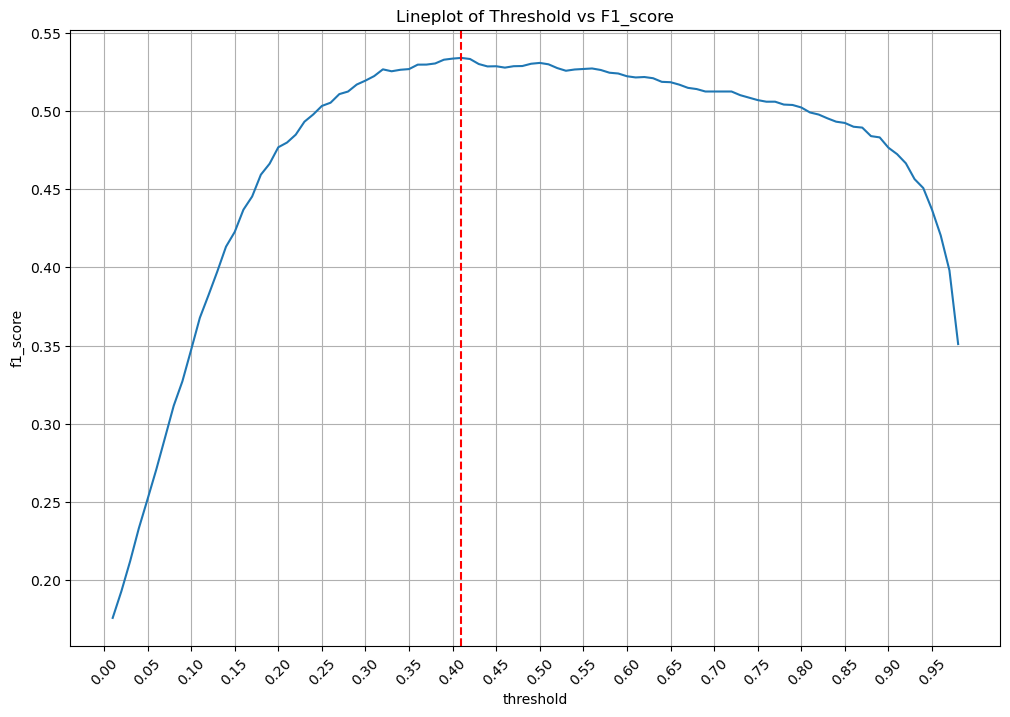

In [61]:
plt.figure(figsize=(12,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("f1_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs F1_score")
plt.axvline(x=optimal_threshold, label=f'Optimal threshold : {optimal_threshold:.4f}',linestyle='--',color='red')
plt.show()

In [62]:
# Get probabilities for training and testing sets
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Generate predictions based on the optimal threshold
y_train_pred_thres = np.where(y_train_prob > optimal_threshold, 1, 0)
y_test_pred_thres = np.where(y_test_prob > optimal_threshold, 1, 0)

# Print classification reports for train and test sets
print("Classification Report for Training Set with Optimal Treshold:")
print(classification_report(y_train, y_train_pred_thres))

print("\nClassification Report for Testing with Set Optimal Treshold:")
print(classification_report(y_test, y_test_pred_thres))

Classification Report for Training Set with Optimal Treshold:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     35097
           1       0.89      0.42      0.57      3268

    accuracy                           0.95     38365
   macro avg       0.92      0.71      0.77     38365
weighted avg       0.94      0.95      0.94     38365


Classification Report for Testing with Set Optimal Treshold:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15043
           1       0.83      0.39      0.53      1400

    accuracy                           0.94     16443
   macro avg       0.89      0.69      0.75     16443
weighted avg       0.94      0.94      0.93     16443



- **Improved Recall for Promotions**: The recall for promotions has improved to 0.42 (training) and to 0.39 (testing) after adjusting the threshold. This suggests that the optimal threshold has helped the model better identify promoted employees but still leaves room for improvement.
- **Precision for Promotions**: Precision for promotions has decreased slightly in the test set (0.83 vs. 0.89 in training), but it's still relatively high, meaning that when the model predicts a promotion, it’s fairly accurate.

In [63]:
print(f'F1-Score (Train) : {f1_score(y_train, y_train_pred_thres)}')
print(f'F1-Score (Test) : {f1_score(y_test, y_test_pred_thres)}')

F1-Score (Train) : 0.5661872003335419
F1-Score (Test) : 0.5341074020319303


In [64]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "prediction":y_test_pred_thres
})

# Print count of actual values
print("Actual class distribution in test set:")
print(final_model_actual_pred_y['actual'].value_counts())

# Print count of predicted values
print("\nPredicted class distribution in test set:")
print(final_model_actual_pred_y['prediction'].value_counts())

Actual class distribution in test set:
actual
0    15043
1     1400
Name: count, dtype: int64

Predicted class distribution in test set:
prediction
0    15776
1      667
Name: count, dtype: int64


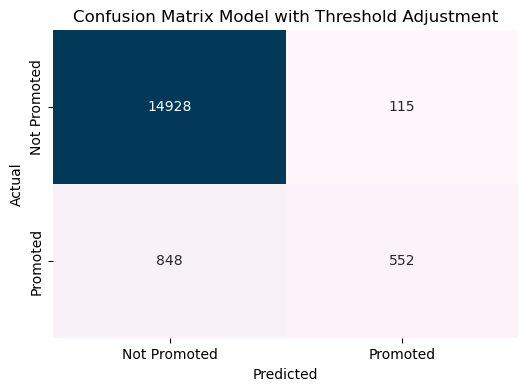

In [65]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix_thres = confusion_matrix(y_test, y_test_pred_thres)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_thres, annot=True, fmt="d", cmap="PuBu", cbar=False,
            xticklabels=["Not Promoted", "Promoted"],
            yticklabels=["Not Promoted", "Promoted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Model with Threshold Adjustment")
plt.show()


- **True Negatives (TN)**: 14928
These are the non-promoted employees that were correctly predicted as not being promoted.

- **False Positives (FP)**: 115
These are the non-promoted employees that were incorrectly predicted as promoted (Type I error).

- **False Negatives (FN)**: 848
These are the promoted employees that were incorrectly predicted as not promoted (Type II error).

- **True Positives (TP)**: 552
These are the promoted employees that were correctly predicted as promoted.

## **Feature Importances**

Feature importance is a step in building a machine learning model that involves calculating the score for all input features in a model to establish the importance of each feature in the decision-making process. The higher the score for a feature, the larger effect it has on the model to predict employee promotion.

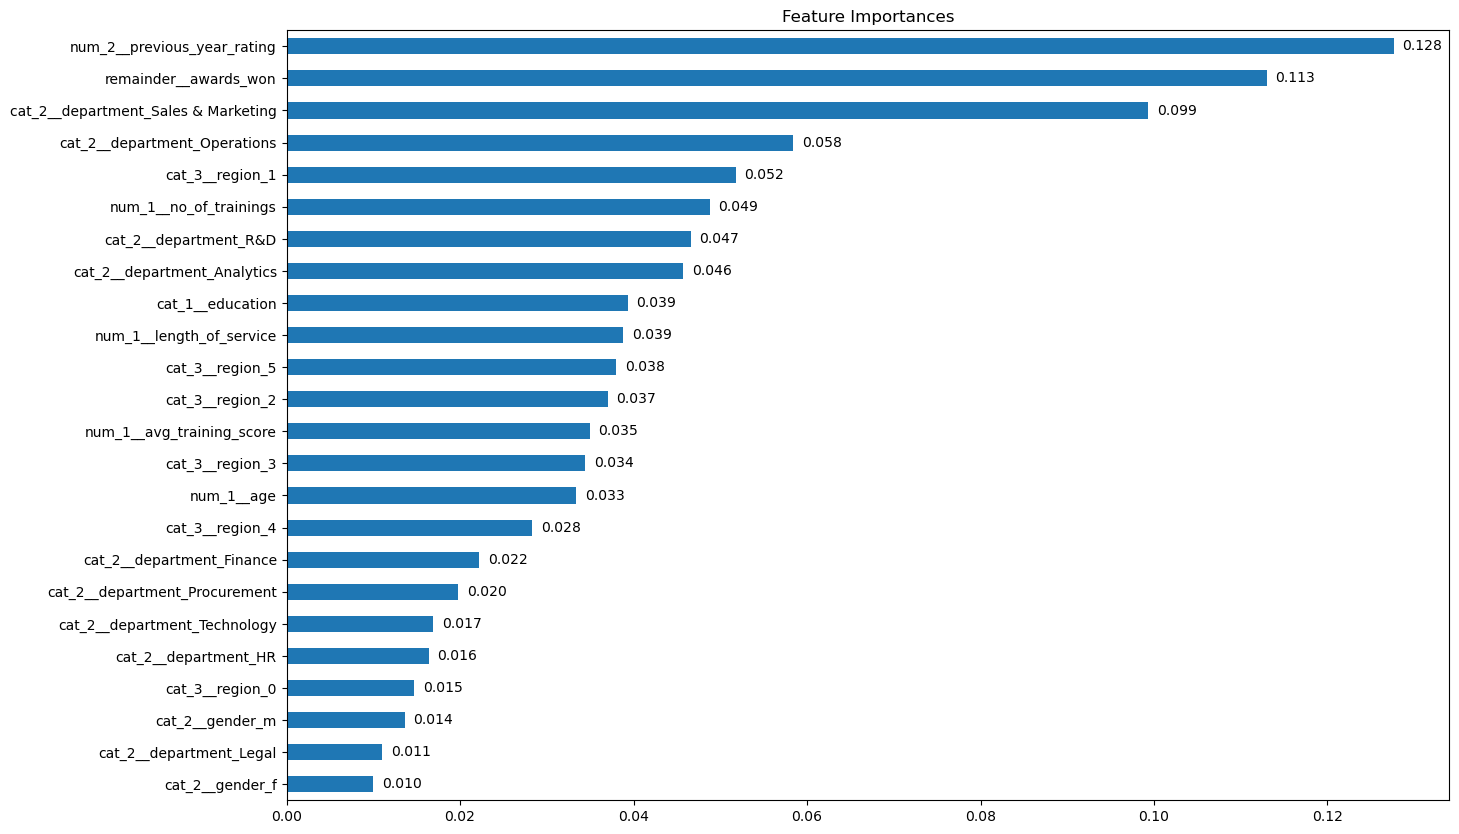

In [66]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Access the final estimator in the pipeline
final_estimator = best_estimator.named_steps['classifier']

# Get the feature importances from the final estimator
feature_importances = final_estimator.feature_importances_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Create a Series with feature importances and sort it
model_coef = pd.Series(feature_importances, index=feature_names).sort_values()

# Plot the feature importances
plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances')


# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # position x (at the end of the bar)
            i.get_y() + i.get_height() / 2,  # position y (middle of the bar)
            f'{i.get_width():.3f}',  # text to display (feature importance value)
            ha='left',  # horizontal alignment (left align)
            va='center')  # vertical alignment (center align)
plt.show()

Top Influential Features :
- **previous_year_rating** (0.128):

    This feature is the most important, indicating that an employee's performance rating from the previous year strongly influences whether they are promoted.
- **awards_won** (0.113):
  
  Whether an employee has won awards is also highly influential.
- **department Sales & Marketing** (0.081681):
  
  The department to which the employee belongs, specifically "Sales & Marketing," significantly impacts the promotion prediction.


## **Model Explainability**

**SHAP (SHapley Additive exPlanations)** values are a way to explain the output of any machine learning model. SHAP values are based on game theory and assign an importance value to each feature in a model. Features with positive SHAP values positively impact the prediction, while those with negative values have a negative impact.

100%|===================| 38339/38365 [04:46<00:00]        

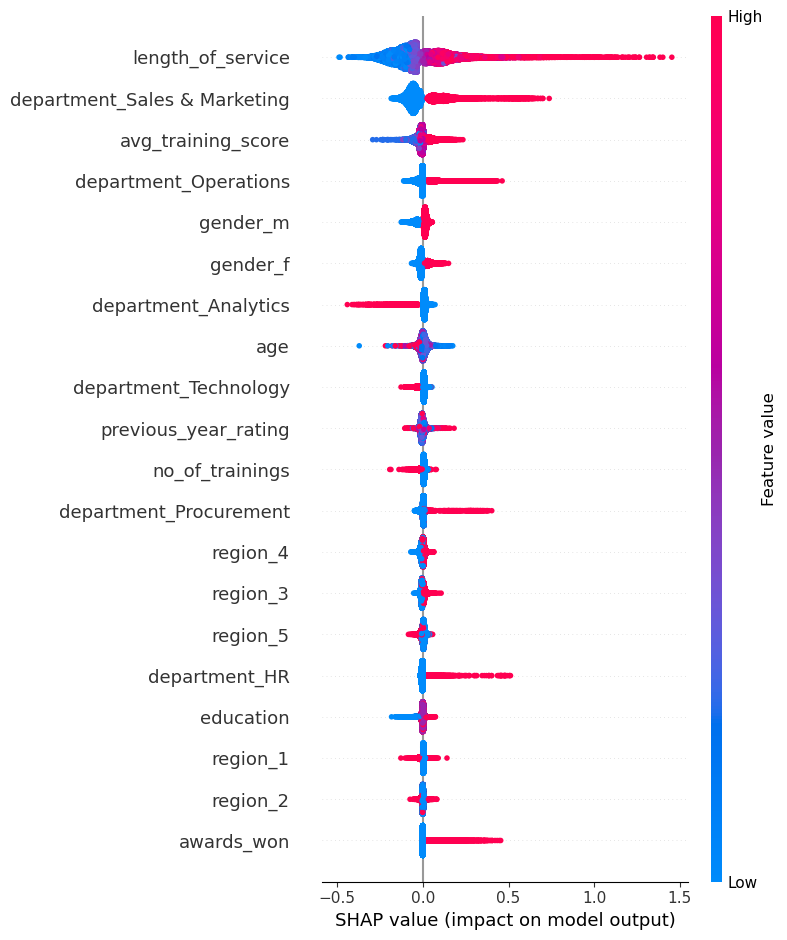

In [67]:
import shap

# Apply preprocessing to the training data
X_train_preprocessed = gscv.best_estimator_.named_steps['preprocessor'].transform(X_train)

# Manually define feature names based on each transformer
num_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
cat_features_ordinal = ['education']
cat_features_onehot = gscv.best_estimator_.named_steps['preprocessor'].named_transformers_['cat_2'].named_steps['onehot'].get_feature_names_out(['department', 'gender'])
cat_features_binary = gscv.best_estimator_.named_steps['preprocessor'].named_transformers_['cat_3'].named_steps['binary'].get_feature_names_out(['region'])
remainder_pass=['awards_won']

# Combine all feature names
feat_cols = num_features + cat_features_ordinal + list(cat_features_onehot) + list(cat_features_binary)+ remainder_pass

# Convert preprocessed data to DataFrame with column names
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feat_cols)

# Get the best model from the pipeline
best_model = gscv.best_estimator_.named_steps['classifier']

# Calculate SHAP values
shap_values = shap.TreeExplainer(best_model, data=X_train_preprocessed, model_output='probability').shap_values(X_train_preprocessed)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=X_train_preprocessed.columns)

Few insights :
- **Length of Service**:

  Longer service (high feature value shown in red) has a positive impact on promotion prediction, suggesting that employees with more years at the company are more likely to be promoted.

- **Department (Sales & Marketing)**:

  Employees in the Sales & Marketing department (high feature value) have a higher probability of promotion. This could imply that the organization prioritizes promotions within this department.
- **Average Training Score**:

  Higher training scores positively impact promotion likelihood. This indicates that employees who perform well in training are more favorably viewed for promotions.


## **Rule Based vs Machine Learning Model**

**Rule-based** machine learning (ML) is an approach where **the model uses explicit rules to make predictions** rather than learning patterns from the data through statistical or neural network methods. This approach allows us to use domain knowledge and specific criteria to define rules for promotion eligibility.

**Rule Based Model for Employee Promotion Prediction :**
1. **Define Promotion Criteria**

  We choose **previous year rating, average training score, awards won, length of service, age, education level**, and **department** as promotion criterias.
  
2. **Define Weight for Each Feature**
  
  Assign weights to features based on their importance in promotion decisions.
  - Awards won : 0.30
  - Previous year rating : 0.25
  - Average training score : 0.20
  - Education Level : 0.10
  - Length of service : 0.05
  - Age : 0.05
  - Department : 0.05

3. **Set Rules for Each Feature**
  
  Each feature is given a score based on defined intervals and conditions. The score based on promotion rate from training set. For numerical features, we used binning to determine each promotion rate for each interval.
  

In [68]:
df_train_rule_based=df_train.copy()
df_test_rule_based=df_test.copy()

In [69]:
# Binning for each numerical feature based on specified intervals

# Previous Year Rating
df_train_rule_based['Previous_Year_Rating_Bin'] = pd.cut(df_train_rule_based['previous_year_rating'],bins=[0, 2, 4, 5],labels=['0-2', '3-4', '5'])

# Average Training Score
df_train_rule_based['Average_Training_Score_Bin'] = pd.cut(df_train_rule_based['avg_training_score'],bins=[40, 55, 70, 85, 99],labels=['40-55', '56-70', '71-85', '86-99'])

# Length of Service
df_train_rule_based['Length_of_Service_Bin'] = pd.cut(df_train_rule_based['length_of_service'],bins=[1, 12, 23, 34],labels=['1-12', '13-23', '24-34'])

# Age
df_train_rule_based['Age_Bin'] = pd.cut(df_train_rule_based['age'],bins=[20, 33, 47, 60],labels=['20-33', '34-47', '48-60'])

# Function to calculate promotion rate for each bin
def calculate_promotion_rate(data, feature_bin):
    promotion_rate = data.groupby(feature_bin)['is_promoted'].mean()
    return promotion_rate.reset_index(name='Promotion Rate')

# Calculate and display promotion rates for each binned feature
# Previous Year Rating Promotion Rate
prev_year_rating_promotion = calculate_promotion_rate(df_train_rule_based, 'Previous_Year_Rating_Bin')
print("Previous Year Rating Promotion Rate:")
print(prev_year_rating_promotion)

# Average Training Score Promotion Rate
avg_training_promotion = calculate_promotion_rate(df_train_rule_based, 'Average_Training_Score_Bin')
print("\nAverage Training Score Promotion Rate:")
print(avg_training_promotion)

# Length of Service Promotion Rate
length_service_promotion = calculate_promotion_rate(df_train_rule_based, 'Length_of_Service_Bin')
print("\nLength of Service Promotion Rate:")
print(length_service_promotion)

# Age Promotion Rate
age_promotion = calculate_promotion_rate(df_train_rule_based, 'Age_Bin')
print("\nAge Promotion Rate:")
print(age_promotion)


Previous Year Rating Promotion Rate:
  Previous_Year_Rating_Bin  Promotion Rate
0                      0-2        0.026298
1                      3-4        0.075715
2                        5        0.161943

Average Training Score Promotion Rate:
  Average_Training_Score_Bin  Promotion Rate
0                      40-55        0.041910
1                      56-70        0.081179
2                      71-85        0.105350
3                      86-99        0.293812

Length of Service Promotion Rate:
  Length_of_Service_Bin  Promotion Rate
0                  1-12        0.087479
1                 13-23        0.070584
2                 24-34        0.022321

Age Promotion Rate:
  Age_Bin  Promotion Rate
0   20-33        0.086458
1   34-47        0.086824
2   48-60        0.070068


- **Previous year rating**
  - 0 - 2 : 0.02698
  - 3 - 4 : 0.075715
  - 5 : 0.161943
- **Average training score**
  - 40 - 55 (Low) : 0.041910
  - 56-70 (Moderate) : 0.081179
  - 71-85 (High) : 0.105350
  - 86-99 (Very High) : 0.293812
- **Awards won**
  - Has won awards (1): 0.434637
  - Has not won awards (0): 0.076835
- **Length of service**
  - 1 - 12 : 0.087479
  - 13 - 23 : 0.070584
  - 24 - 34 : 0.022321
- **Age**
  - 20 - 33 years old : 0.086458
  - 34 - 47 years old : 0.08824
  - 48 - 60 years old: 0.070068
- **Education**
  - Master's & above : 0.099686
  - Bachelor's	: 0.081719
  - Below Secondary	: 0.075229
- **Department**
  - Technology :	0.104930
  - Procurement :	0.096800
  - Analytics : 0.091877
  - Operations : 0.090944
  - Finance	: 0.079507
  - Sales & Marketing	: 0.073312
  - R&D	: 0.066187
  - HR	: 0.058858
  - Legal	: 0.054519

4. **Calculate Final Promotion Score**

  For each employee, calculate a weighted score by applying the weights to each of the feature scores.

  **Total Promotion Score**= (Previous Year Rating × 0.25 x 100)+ (Average Training Score × 0.2 x 100) + (Awards Won × 0.3 x 100) + (Length of Service × 0.05 x 100) + (Age × 0.05 x 100) + (Education Level × 0.1 x 100) + (Department × 0.05 x 100).

5. **Define Promotion Threshold**

  Based on the training data, it is found that only 8.52% of employees are promoted. We can sort the employees by their calculated promotion score and assign the promotion label (1) to the top 8.52%.
  - **Calculate Total Employees in the Top 8.52%**:

    Multiply the total number of employees by 8.52% (or 0.0852). This gives us the number of employees who should be labeled as promoted.
  - **Sort by Promotion Score**:

    We sort employees by their promotion score in descending order, so the employees with the highest scores are at the top.
  - **Label Top 8.52% as Promoted**:

    After sorting, we label the top 8.52% of employees as 1 (promoted), and the rest as 0 (not promoted).





In [70]:
df_test_rule_based['education'].fillna("Below Secondary", inplace=True)
df_test_rule_based['previous_year_rating'].fillna(0, inplace=True)

In [71]:
def calculate_promotion_score(data):
    score = 0

    # Previous year rating-based weight
    if data['previous_year_rating'] == 5:
        score += 0.161943 * 0.25 * 100
    elif data['previous_year_rating'] == 3 or data['previous_year_rating'] == 4:
        score += 0.075715 * 0.25 * 100
    elif data['previous_year_rating'] <= 2:
        score += 0.02698 * 0.25 * 100

    # Average training score weight
    if 40 <= data['avg_training_score'] <= 55:
        score += 0.041910 * 0.20 * 100
    elif 56 <= data['avg_training_score'] <= 70:
        score += 0.081179 * 0.20 * 100
    elif 71 <= data['avg_training_score'] <= 85:
        score += 0.105350 * 0.20 * 100
    elif 86 <= data['avg_training_score'] <= 90:
        score += 0.293812 * 0.20 * 100

    # Awards won-based weight
    if data['awards_won'] == 1:
        score += 0.434637 * 0.3 * 100
    else:
        score += 0.076835 * 0.3 * 100

    # Length of service-based weight
    if 1 <= data['length_of_service'] <= 12:
        score += 0.087479 * 0.05 * 100
    elif 13 <= data['length_of_service'] <= 23:
        score += 0.070584 * 0.05 * 100
    elif 24 <= data['length_of_service'] <= 34:
        score += 0.022321 * 0.05 * 100

   # Age-based weight
    if 20 <= data['age'] <= 33:
        score += 0.086265 * 0.05 * 100
    elif 34 <= data['age'] <= 47:
        score += 0.088004 * 0.05 * 100
    elif 48 <= data['age'] <= 60:
        score += 0.066782 * 0.05 * 100

    # Education-based weight
    education_weights = {
        "Master's & above": 0.099686, "Bachelor's": 0.081719, "Below Secondary": 0.075229
    }
    score += education_weights.get(data['education'], 0)*0.1*100

    # Department-based weight
    department_weights = {
        "Technology": 0.104930, "Procurement": 0.096800, "Analytics": 0.091877,
        "Operations": 0.090944, "Finance": 0.079507, "Sales & Marketing": 0.073312,
        "R&D": 0.066187, "HR": 0.058858, "Legal": 0.054519
    }
    score += department_weights.get(data['department'], 0)*0.05*100

    return score

In [72]:
# Apply the rule-based prediction function test data
df_test_rule_based['employee_score'] = df_test_rule_based.apply(calculate_promotion_score, axis=1)

Total Employees in the Top 8.52% : 0.0852 x 16443 = 1400 top employees will be labeled as promoted (1).

In [73]:
df_test_rule_based['is_promoted'].value_counts()

is_promoted
0    15043
1     1400
Name: count, dtype: int64

In [74]:
# Sort the DataFrame by 'employee_score' in descending order
df_test_rule_based = df_test_rule_based.sort_values(by='employee_score', ascending=False)

# Create the 'promotion_prediction' column and mark the top 1400 employees
df_test_rule_based['promotion_prediction'] = 0
df_test_rule_based['promotion_prediction'].iloc[:1400] = 1

# Display the updated DataFrame
df_test_rule_based.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,employee_score,promotion_prediction
7342,56183,Analytics,region_4,Master's & above,m,sourcing,3,37,5.0,9,1,89,1,25.297585,1
10969,59969,Operations,region_16,Master's & above,m,other,1,34,5.0,8,1,87,1,25.292920,1
10093,19173,Sales & Marketing,region_7,Master's & above,m,sourcing,1,33,5.0,7,1,90,1,25.196065,1
486,72289,Technology,region_17,Bachelor's,f,sourcing,1,29,5.0,4,1,86,1,25.174485,1
4257,36182,Technology,region_7,Bachelor's,m,referred,1,30,5.0,2,1,88,1,25.174485,1


In [75]:
# Generate a classification report
print("Classification Report - Test Set with Rule-Based")
print(classification_report(df_test_rule_based['is_promoted'], df_test_rule_based['promotion_prediction']))

Classification Report - Test Set with Rule-Based
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     15043
           1       0.27      0.27      0.27      1400

    accuracy                           0.88     16443
   macro avg       0.60      0.60      0.60     16443
weighted avg       0.88      0.88      0.88     16443



In [76]:
# Calculate and display the F1 score
print("F1 score Rule Based (Test):", f1_score(df_test_rule_based['is_promoted'], df_test_rule_based['promotion_prediction']))

F1 score Rule Based (Test): 0.26857142857142857


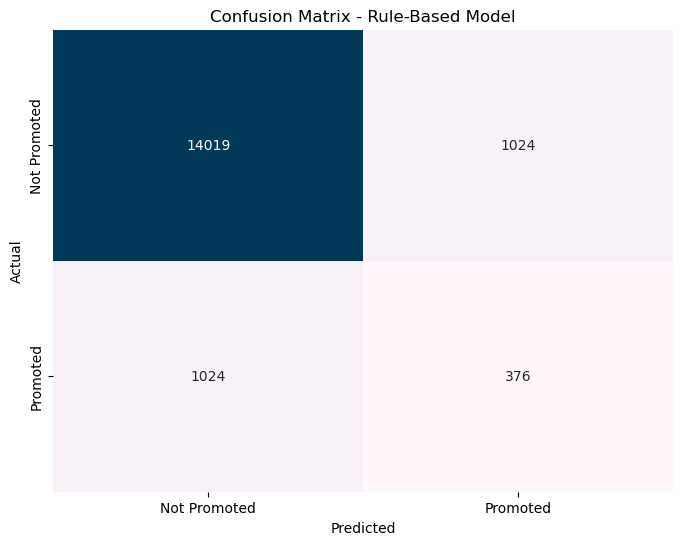

In [77]:
from sklearn.metrics import confusion_matrix

# Step 1: Compute the confusion matrix
conf_matrix_rule_based = confusion_matrix(df_test_rule_based['is_promoted'], df_test_rule_based['promotion_prediction'])

# Step 2: Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rule_based, annot=True, fmt='d', cmap='PuBu', cbar=False,
            xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.title('Confusion Matrix - Rule-Based Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Compare Rule Based Model with Machine Learning Model**

In [78]:
print("Classification Report Test Set with Rule-Based")
test_report_rule=classification_report(df_test_rule_based['is_promoted'], df_test_rule_based['promotion_prediction'])
print(test_report_rule)
print("F1 score (Test) Rule Based :", f1_score(df_test_rule_based['is_promoted'], df_test_rule_based['promotion_prediction']))

print("\n\nClassification Report Test Set with Machine Learning Threshold Adjusted Model")
test_report_ml = classification_report(y_test, y_test_pred_thres)
print(test_report_ml)
print("F1 Score (Test) Machine Learning Threshold Adjusted Model :", f1_score(y_test, y_test_pred_thres))

Classification Report Test Set with Rule-Based
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     15043
           1       0.27      0.27      0.27      1400

    accuracy                           0.88     16443
   macro avg       0.60      0.60      0.60     16443
weighted avg       0.88      0.88      0.88     16443

F1 score (Test) Rule Based : 0.26857142857142857


Classification Report Test Set with Machine Learning Threshold Adjusted Model
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15043
           1       0.83      0.39      0.53      1400

    accuracy                           0.94     16443
   macro avg       0.89      0.69      0.75     16443
weighted avg       0.94      0.94      0.93     16443

F1 Score (Test) Machine Learning Threshold Adjusted Model : 0.5341074020319303


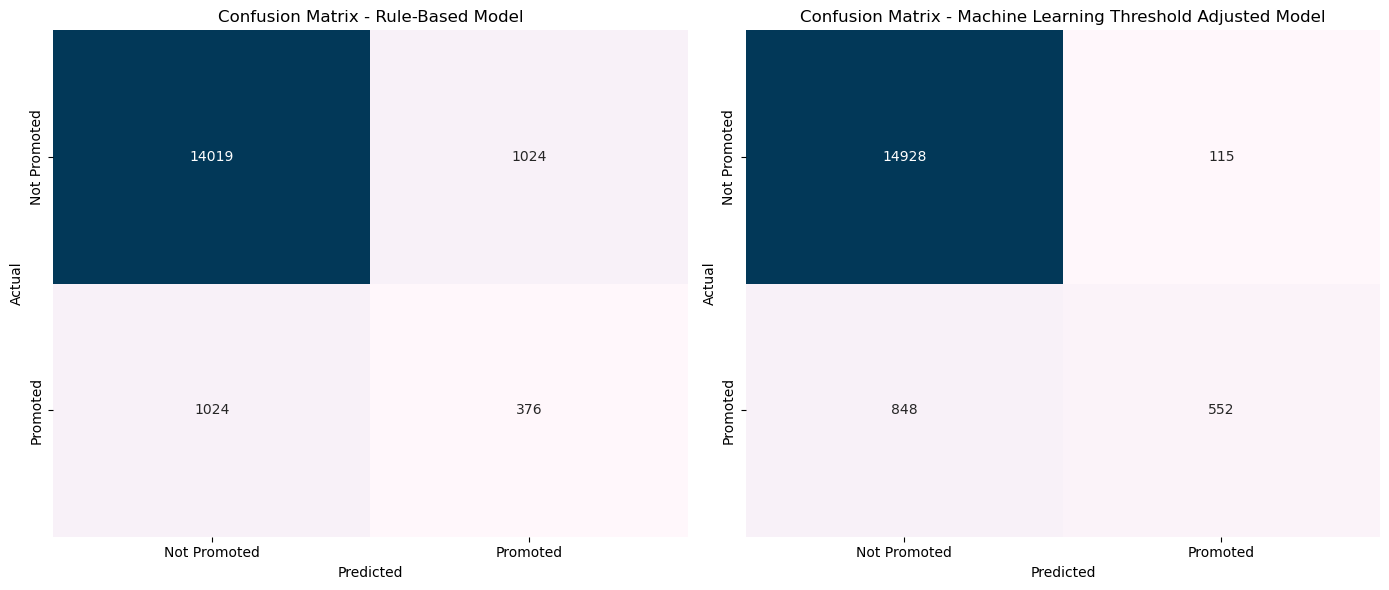

In [79]:
# Compute confusion matrices
conf_matrix_thres = confusion_matrix(y_test, y_test_pred_thres)
conf_matrix_rule_based = confusion_matrix(df_test_rule_based['is_promoted'], df_test_rule_based['promotion_prediction'])

# Set up the matplotlib figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the rule-based model confusion matrix
sns.heatmap(conf_matrix_rule_based, annot=True, fmt="d", cmap="PuBu", cbar=False,
            xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'], ax=axes[0])
axes[0].set_title("Confusion Matrix - Rule-Based Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Plot the Machine Learning Threshold-adjusted model confusion matrix
sns.heatmap(conf_matrix_thres, annot=True, fmt="d", cmap="PuBu", cbar=False,
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'], ax=axes[1])
axes[1].set_title("Confusion Matrix - Machine Learning Threshold Adjusted Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
# Adjust layout for a clear display
plt.tight_layout()
plt.show()

**Rule Based Model** :
- False Negative (FN) : 1024
- False Positive (FP) : 1024

**Best Machine Learning Model** :
- False Negative (FN) : 848
- False Positive (FP) : 115

**Insights** :
- The **machine learning model** has a **lower number of false negatives** (848) compared to the rule-based model (1024). This suggests that the machine learning model is better at identifying employees who deserve promotions, reducing the risk of missing potential candidates for promotion.
- The **machine learning model** also shows **a much lower number of false positives** (115) compared to the rule-based model (1024). This indicates that the machine learning model is more precise in predicting which employees do not qualify for promotion.

Overall, the machine learning model demonstrates a clear advantage over the rule-based model in both identifying deserving candidates for promotion and minimizing the risk of promoting unqualified individuals.

## **Model Constraints**

In [80]:
df_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,38365.000000,38365.000000,35487.000000,38365.000000,38365.000000,38365.000000,38365.000000
mean,1.251922,34.829089,3.331755,5.876684,0.023329,63.438785,0.085182
std,0.612238,7.676767,1.260265,4.278064,0.150947,13.363875,0.279156
min,1.000000,20.000000,1.000000,1.000000,0.000000,40.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,34.000000,1.000000,99.000000,1.000000


In [81]:
df_train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,38365,38365,36709,38365,38365
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,11717,8570,25661,26921,21308


In [82]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

unique_values_df = pd.DataFrame({col: [df_train[col].unique()] for col in df_train.select_dtypes(include='object').columns}).T
unique_values_df.columns = ['unique_values']  # Set the column name
unique_values_df

,unique_values
department,"[Legal, Finance, Sales & Marketing, Operations, Analytics, HR, Technology, Procurement, R&D]"
region,"[region_13, region_2, region_11, region_22, region_23, region_7, region_24, region_32, region_31, region_4, region_28, region_15, region_16, region_8, region_17, region_6, region_26, region_30, region_20, region_27, region_29, region_10, region_1, region_19, region_21, region_12, region_9, region_5, region_25, region_14, region_3, region_33, region_34, region_18]"
education,"[Bachelor's, nan, Master's & above, Below Secondary]"
gender,"[m, f]"
recruitment_channel,"[sourcing, other, referred]"


**Model Limitation**

| **Feature Name**            | **Allowed Range**                                                                                                                                                                                                                      | **Additional Info**                                                                                             |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| `no_of_trainings`           | 1 - 10                                                                                                                                                                                                                                | Number of trainings an employee has attended.                                                                   |
| `age`                       | 20 - 60                                                                                                                                                                                                                                | Age of the employee.                                                                                            |
| `previous_year_rating`      | 1 - 5                                                                                                                                                                                                                                  | Rating from the previous year.                                                                                  |
| `length_of_service`         | 1 - 34                                                                                                                                                                                                                                 | Number of years the employee has been with the company.                                                         |
| `awards_won`                | 0, 1                                                                                                                                                                                                                                   | Whether the employee has won an award (0: No, 1: Yes).                                                          |
| `avg_training_score`        | 40 - 99                                                                                                                                                                                                                                | Average score from employee's training sessions.                                                                |
| `is_promoted`               | 0, 1                                                                                                                                                                                                                                   | Whether the employee was promoted (0: No, 1: Yes).                                                              |
| `department`                | Legal, Finance, Sales & Marketing, Operations, Analytics, HR, Technology, Procurement, R&D                                                                                                       | Department the employee belongs to.                                                                             |
| `region`                    | region 1,region 2,...,region 34 | Geographic region of the employee.                                                                             |
| `education`                 | Bachelor's, Master's & above, Below Secondary                                                                                                                                                                                     | Education level of the employee.                                                                               |
| `gender`                    | m, f                                                                                                                                                                                                                                   | Gender of the employee.                                                                                         |
| `recruitment_channel`       | sourcing, other, referred                                                                                                                                                                                                              | Channel through which the employee was recruited.                                                               |


The model will run well if:
- There are **no missing values**
- There are **no duplicates**
- All **outliers are within a reasonable range of values** ​​and there are **no extreme values** ​​that could cause bias in the model.


## **Save Model**

In [86]:
#Saving models
best_estimator = gscv.best_estimator_
filename = 'best_model_hr_analytics.sav'

# # Uncomment code for saving file model

# pickle.dump(best_estimator,open(filename,'wb'))

# **Conclusions & Recommendations**

## **Conclusions**

In [84]:
print(classification_report(y_test, y_test_pred_thres))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15043
           1       0.83      0.39      0.53      1400

    accuracy                           0.94     16443
   macro avg       0.89      0.69      0.75     16443
weighted avg       0.94      0.94      0.93     16443



Based on the classification report results from our threshold adjusted employee promotion prediction model, we can conclude that if we use this model to filter the list of candidates for potential promotion, the model will be able to:

- **Accurately identify 99% of employees who will not be promoted**, meaning about 99% of employees who are not eligible for promotion will be correctly screened out by the model (based on the recall for class 0). This greatly helps HR save time and effort by not having to review many employees who are not prioritized for promotion.

- **The model successfully identifies 40% of the total employees who are eligible for promotion** (based on the recall for class 1). So, by using this model, HR can find 40% of the employees who truly deserve a promotion from the overall list of promotable employees.

- **The promotion prediction accuracy (precision for class 1) is 78%**, meaning that when the model predicts an employee is eligible for promotion, the prediction is correct about 78% of the time. Therefore, around 22% of employees predicted to be eligible for promotion actually do not meet the criteria but are still included in the list suggested by the model for potential promotion.

Based on the model, the **top three key factors influencing employee promotions** are whether an employee has won awards, employee's previous year rating, and the department where an employee works is Sales & Marketing.

## **Recommendations**

### **Model Improvement**

- **Mandatory Data Completion Policies**
  
  Ensuring all employees complete the data, especially last education data, this can improve data quality for promotions analysis.
- **Create a 'Not Rated' Category for New Employees**:

  Instead of leaving the previous year rating field blank, introduce a Not Rated or New Employee category. This way, the absence of a rating is intentional and doesn’t count as missing data, allowing the model to recognize these employees distinctly.
- **Add New Features**

  Adding new features that might influence promotion decisions, like KPI score, leadership skills, or peer feedback scores.
- **Use another Machine Learning Model**

   Use more complex algorithms, or even deep learning models, try different hyperparameter tuning, and apply different oversampling other than Random Over Sampling and SMOTE.


### **Business Recommendations**

- **Encourage Awards and Recognition Programs**

  Since awards is the top predictor, creating more recognition programs can motivate employees to excel and may help identify top performers for promotion.

- **Focus on Annual Performance Reviews**

  The previous year’s performance rating is critical, so ensuring that the review process is clear and fair can help identify the right talent for promotion.

- **Understand Departmental and Regional Differences**

  The importance of departments and regions suggests that promotion criteria or opportunities may vary across the organization. HR could review promotion policies to ensure fairness and consider whether certain regions or departments need additional support for employee advancement.

